# Análisis Exploratorio de Datos

En este notebook se realiza el análisis exploratorio de los datos correspondientes a los siniestros viales con víctimas fatales, y a los datos de las víctimas. Sobre el final, además, se utilizan los datos demográficos de población para construir 2 KPI´s

Importamos las librerías necesarias:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.express as px
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from datetime import datetime

Configuramos el estilo de seaborn en todo el notebook:

In [2]:
sns.set_style('darkgrid')

Iniciamos el análisis de los hechos, el dataset puede descargarse [aquí](https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/victimas-siniestros-viales/homicidios.xlsx). <br> 
A continuación  cargamos el dataframe y mostramos las primeras filas:

In [15]:
df_hechos = pd.read_excel('Datasets/homicidios.xlsx', sheet_name='HECHOS')
df_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Veamos las ultimas filas:

In [16]:
df_hechos.tail()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6,PADRE CARLOS MUJICA 709,CALLE,...,709.0,NaN,PADRE CARLOS MUGICA 709,1,Point (107664.16647795 104708.63962087),-58.37976155,-34.58679619,BICICLETA-AUTO,BICICLETA,AUTO


Veamos información general del dataframe:

In [17]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Vemos que hay varias columnas con distinta cantidad de datos por lo tanto ya podemos ver que hay datos nulos. <br>
Veamos si hay valores duplicados:

In [18]:
df_hechos.duplicated().sum()

0

No hay valores duplicados. <br>
Veamos el recuento de nulos:

In [19]:
df_hechos.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Vemos que hay nulos en las columnas Calle y Altura. Antes de continuar, si observamos con atención el dataframe, veremos que hay valores faltantes que se reemplazan con 'SD', 'SD-SD' o 'point (. .)'. De esta manera, es conveniente realizar el recuento de estos faltantes. Para ello primero pasaremos todo el dataframe a minúsculas, y luego reemplazaremos por np.nan estos faltantes. Luego contamos nuevamente los nulos:

In [20]:
df_hechos = df_hechos.applymap(lambda x: x.lower() if isinstance(x, str) else x) # convertimos a minúsculas
faltantes = ['', ' ', '.', '...', 'sd', 'sd-sd', 'point (. .)']                 # generamos una lista de posibles faltantes
df_hechos.replace(faltantes, np.nan, inplace=True)                              # reemplazamos faltantes por np.nan
df_hechos.isna().sum()                                                          # volvemos a contar nulos

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                 14
pos x                     12
pos y                     12
PARTICIPANTES              5
VICTIMA                    9
ACUSADO                   23
dtype: int64

De esta manera vemos que se agregaron datos faltantes en XY (CABA), pos x, pos y, Participantes, Victima, Acusado, Hora, HH, Lugar del Hecho y calle.

Realizaremos la imputación de datos en pos x y pos y en base a datos de dirección. Esto puede verse también en detalle en el archivo [ETL](ETL.ipynb)

Los faltantes en pos x y pos y pueden deducirse de estas columnas:

In [21]:
df_hechos[df_hechos['pos x'].isna()][['LUGAR_DEL_HECHO', 'Calle', 'Altura', 'Dirección Normalizada']]

,LUGAR_DEL_HECHO,Calle,Altura,Dirección Normalizada
38,autopista lugones pk 10000,"lugones, leopoldo av.",NaN,NaN
106,au buenos aires - la plata km. 4,autopista buenos aires - la plata,NaN,NaN
119,NaN,NaN,NaN,NaN
139,autopista 25 de mayo,autopista 25 de mayo,NaN,autopista 25 de mayo
176,av. leopoldo lugones pkm 6900,"lugones, leopoldo av.",NaN,"lugones, leopoldo av."
180,au perito moreno y ramal enlace au1/au6,autopista perito moreno,NaN,NaN
181,au dellepiane 2400,autopista dellepiane luis tte. gral.,NaN,NaN
256,au arturo frondizi pkm 3100,autopista 1 sur presidente arturo frondizi,NaN,autopista 1 sur presidente arturo frondizi
313,autopista lugones km 4.7,"lugones, leopoldo av.",NaN,NaN
546,"lugones, leopoldo av. km 6,1","lugones, leopoldo av.",NaN,NaN


La mayoría de los datos los podemos obtener investigando sobre los puntos kilometricos (pk o pkm) cada autopista o numeración de avenida. A continuación un diccionario donde cada índice se relaciona con pos x (longitud) y pos y (latitud). Si bien los datos obtenidos son aproximados, son útiles a los fines de nuestro análisis para posicionarlos en un mapa. Esta información la obtenemos en [este enlace](https://mapa.buenosaires.gob.ar/comollego/?lat=-34.620000&lng=-58.440000&zl=12&modo=transporte)
Sumado a la investigación de cómo está numerada cada calle, avenida y autopista.

In [22]:
df_hechos.rename(columns= {'pos x': 'long', 'pos y': 'lat'}, inplace=True)      # cambiampos los nombres de las columnas pos x y pos y

In [23]:
# mapea indice a [lat, long]
mapeo_pos = {
    38: [-34.546421, -58.442395],
    106: [-34.624967, -58.362637],
    176: [-34.567216, -58.408535],
    180: [-34.649657, -58.465934],
    181: [-34.643183, -58.462656],  # este punto se hace coincidir con comuna 7, rotonda dellepiane / au 25 de mayo
    256: [-34.630948, -58.378601],
    313: [-34.559287, -58.420465],
    546: [-34.565585, -58.411064],
    559: [-34.663397, -58.493317],
    621: [-34.628112, -58.357098]   
}

En el siguiente bucle lo que hacemos es asignar el valor del diccionario (ya sea latitud o longitud) a la posición correspondiente en el dataframe.

In [24]:
indices = mapeo_pos.keys()
for i in indices:
    df_hechos.loc[i, 'lat'] = mapeo_pos[i][0]
    df_hechos.loc[i, 'long'] = mapeo_pos[i][1]

Veamos si la imputación fue correcta:

In [25]:
df_hechos.iloc[list(indices), :]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),long,lat,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20.0,autopista lugones pk 10000,autopista,...,NaN,NaN,NaN,13,NaN,-58.442395,-34.546421,moto-sd,moto,NaN
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0.0,au buenos aires - la plata km. 4,autopista,...,NaN,NaN,NaN,4,NaN,-58.362637,-34.624967,moto-cargas,moto,cargas
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9.0,av. leopoldo lugones pkm 6900,gral paz,...,NaN,NaN,"lugones, leopoldo av.",14,NaN,-58.408535,-34.567216,moto-cargas,moto,cargas
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11.0,au perito moreno y ramal enlace au1/au6,autopista,...,NaN,NaN,NaN,9,NaN,-58.465934,-34.649657,moto-cargas,moto,cargas
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3.0,au dellepiane 2400,autopista,...,NaN,NaN,NaN,7,NaN,-58.462656,-34.643183,auto-auto,auto,auto
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23.0,au arturo frondizi pkm 3100,autopista,...,NaN,NaN,autopista 1 sur presidente arturo frondizi,4,NaN,-58.378601,-34.630948,moto-pasajeros,moto,pasajeros
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22.0,autopista lugones km 4.7,autopista,...,NaN,NaN,NaN,14,NaN,-58.420465,-34.559287,peaton-auto,peaton,auto
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6.0,"lugones, leopoldo av. km 6,1",autopista,...,NaN,NaN,NaN,14,NaN,-58.411064,-34.565585,moto-objeto fijo,moto,objeto fijo
559,2020-0039,1,2020-09-01,2020,9,1,19:17:42,19.0,murguiondo 2700,calle,...,NaN,NaN,murguiondo,9,NaN,-58.493317,-34.663397,peaton-cargas,peaton,cargas
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9.0,"au buenos aires la plata km 4,5",autopista,...,NaN,NaN,NaN,4,NaN,-58.357098,-34.628112,moto-cargas,moto,cargas


El id 2017-0042 tiene incorrecto el dato 'tipo_de_calle', que debe ser autopista. A continuación lo corregimos. 

In [26]:
df_hechos.loc[176, 'TIPO_DE_CALLE'] = 'autopista'

Nos quedan sin imputar las posiciones de los índices 119 y 139. Veamos estas dos filas:

In [27]:
df_hechos.iloc[[119, 139], :]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),long,lat,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20.0,NaN,calle,...,NaN,NaN,NaN,0,NaN,NaN,NaN,peaton-sd,peaton,NaN
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0.0,autopista 25 de mayo,autopista,...,NaN,NaN,autopista 25 de mayo,0,NaN,NaN,NaN,NaN,NaN,NaN


Vemos que faltan los datos más importantes, además el valor de Comuna 0 también corresponde a un dato faltante, ya que las comunas en CABA están numeradas comenzando en 1. Por lo tanto estos dos registros no servirán para el análisis y procedemos a eliminarlos.

In [28]:
df_hechos.drop(index=[119, 139], inplace=True)

Veamos si hay mas registros con valor 0 en comuna:

In [29]:
df_hechos[df_hechos['COMUNA'].isin([0])]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),long,lat,PARTICIPANTES,VICTIMA,ACUSADO


No hay registros con valor 0 en comuna.

En esta [URL](https://buenosaires.gob.ar/jefaturadegabinete/atencion-ciudadana-y-gestion-comunal/gestion-comunal/comunas) podrás encontrar información sobre las comunas en CABA. La Ciudad de Buenos Aires se encuentra organizada en 15 Comunas. Por lo tanto el máximo en esta columna debe ser 15. Veamos los valores de la columna COMUNA

In [30]:
sorted(df_hechos['COMUNA'].unique().tolist())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

De esta manera verificamos que los valores que figuran en la columna comuna son los correctos.

Ahora sí, procedemos a eliminar las columnas que no utilizaremos 

In [32]:
df_hechos = df_hechos.drop(columns=['Calle', 'Altura', 'Cruce', 'Dirección Normalizada', 'XY (CABA)', 'LUGAR_DEL_HECHO'])

Veamos nuevamente la suma de nulos por columna

In [33]:
df_hechos.isna().sum()

ID                0
N_VICTIMAS        0
FECHA             0
AAAA              0
MM                0
DD                0
HORA              1
HH                1
TIPO_DE_CALLE     0
COMUNA            0
long              0
lat               0
PARTICIPANTES     4
VICTIMA           8
ACUSADO          21
dtype: int64

Veamos los faltantes en la columna ACUSADO

In [34]:
df_hechos[df_hechos['ACUSADO'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,long,lat,PARTICIPANTES,VICTIMA,ACUSADO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,avenida,8,-58.46503904,-34.68092974,moto-sd,moto,NaN
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10.0,gral paz,13,-58.46743471,-34.53476874,moto-sd,moto,NaN
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0.0,autopista,4,-58.37714647568196,-34.63657525428238,NaN,NaN,NaN
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20.0,autopista,13,-58.442395,-34.546421,moto-sd,moto,NaN
57,2016-0080,1,2016-06-18,2016,6,18,06:42:00,6.0,gral paz,9,-58.52927982,-34.63931752,auto-sd,auto,NaN
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19.0,gral paz,9,-58.52932872,-34.65014993,NaN,NaN,NaN
83,2016-0110,1,2016-08-24,2016,8,24,20:21:00,20.0,avenida,9,-58.51232237,-34.65903530,peaton-sd,peaton,NaN
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6.0,avenida,12,-58.49659234,-34.56353635,NaN,NaN,NaN
105,2016-0135,1,2016-10-24,2016,10,24,05:00:00,5.0,avenida,14,-58.42260225,-34.56403694,peaton-sd,peaton,NaN
112,2016-0143,1,2016-11-06,2016,11,6,04:41:00,4.0,avenida,8,-58.44451316,-34.68475866,moto-sd,moto,NaN


Como se observa, los faltantes de Participantes y Víctima también coinciden con faltante en Acusado. Por otro lado, cuando se tiene uno de los datos de los participantes, pero no el segundo (por ejemplo peaton-sd), el dato faltante también está en Acusado. Dado que son 21 registros, optamos por no eliminarlos del análisis, para aprovechar la información en el resto de las columnas. La misma acción se tomará con respecto al dato faltante en las columnas HH y Hora:

In [35]:
df_hechos[df_hechos['HH'].isna()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,long,lat,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,NaN,NaN,gral paz,11,-58.52169422,-34.59471640,moto-moto,moto,moto


A fines de coherencia, cambiaremos el nombre del dataframe: 

In [57]:
df = df_hechos

In [62]:
df.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,long,lat,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,avenida,8,-58.47533969,-34.68757022,moto-auto,moto,auto
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,gral paz,9,-58.50877521,-34.66977709,auto-pasajeros,auto,pasajeros
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,avenida,1,-58.39040293,-34.63189362,moto-auto,moto,auto
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,avenida,8,-58.46503904,-34.68092974,moto-sd,moto,NaN
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,avenida,1,-58.38718297,-34.62246630,moto-pasajeros,moto,pasajeros


Veamos los ultimos 5 registros

In [59]:
df.tail()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,long,lat,PARTICIPANTES,VICTIMA,ACUSADO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17.0,avenida,7,-58.43353773,-34.64561636,moto-auto,moto,auto
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1.0,autopista,9,-58.46739825,-34.65117757,moto-auto,moto,auto
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0.0,avenida,11,-58.47293407,-34.61984745,moto-cargas,moto,cargas
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10.0,avenida,9,-58.47066794,-34.65021673,auto-cargas,auto,cargas
695,2021-0097,1,2021-11-18,2021,11,18,06:10:00,6.0,calle,1,-58.37976155,-34.58679619,bicicleta-auto,bicicleta,auto


Cambiemos el tipo de dato de long y lat a float

In [64]:
df['long'] = df['long'].astype(float)
df['lat'] = df['lat'].astype(float)

Veamos gráficamente los valores nulos

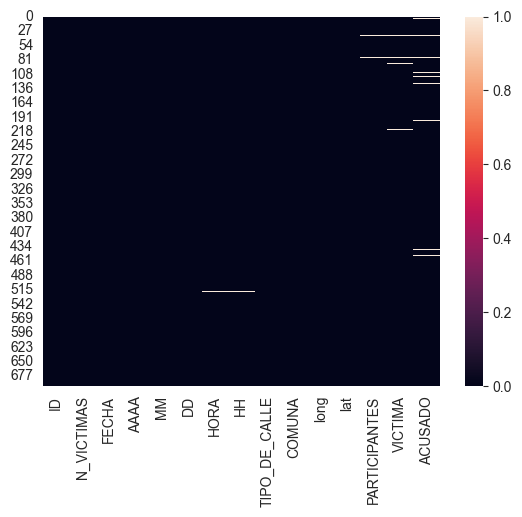

In [65]:
sns.heatmap(df.isna());

Como habíamos observado, los nulos que quedan en el dataset corresponden a: <br>
- un registro que no tiene hora (por lo tanto tampoco franja horaria HH)
- registros donde falta uno de los participantes, la víctima y/o el acusado <br>

Estos faltantes no afectan el análisis que haremos, por lo que se dejarán como están.

Visualicemos ahora si hay correlación entre las variables numéricas. Para ello podemos usar la gráfica pairplot de seaborn:

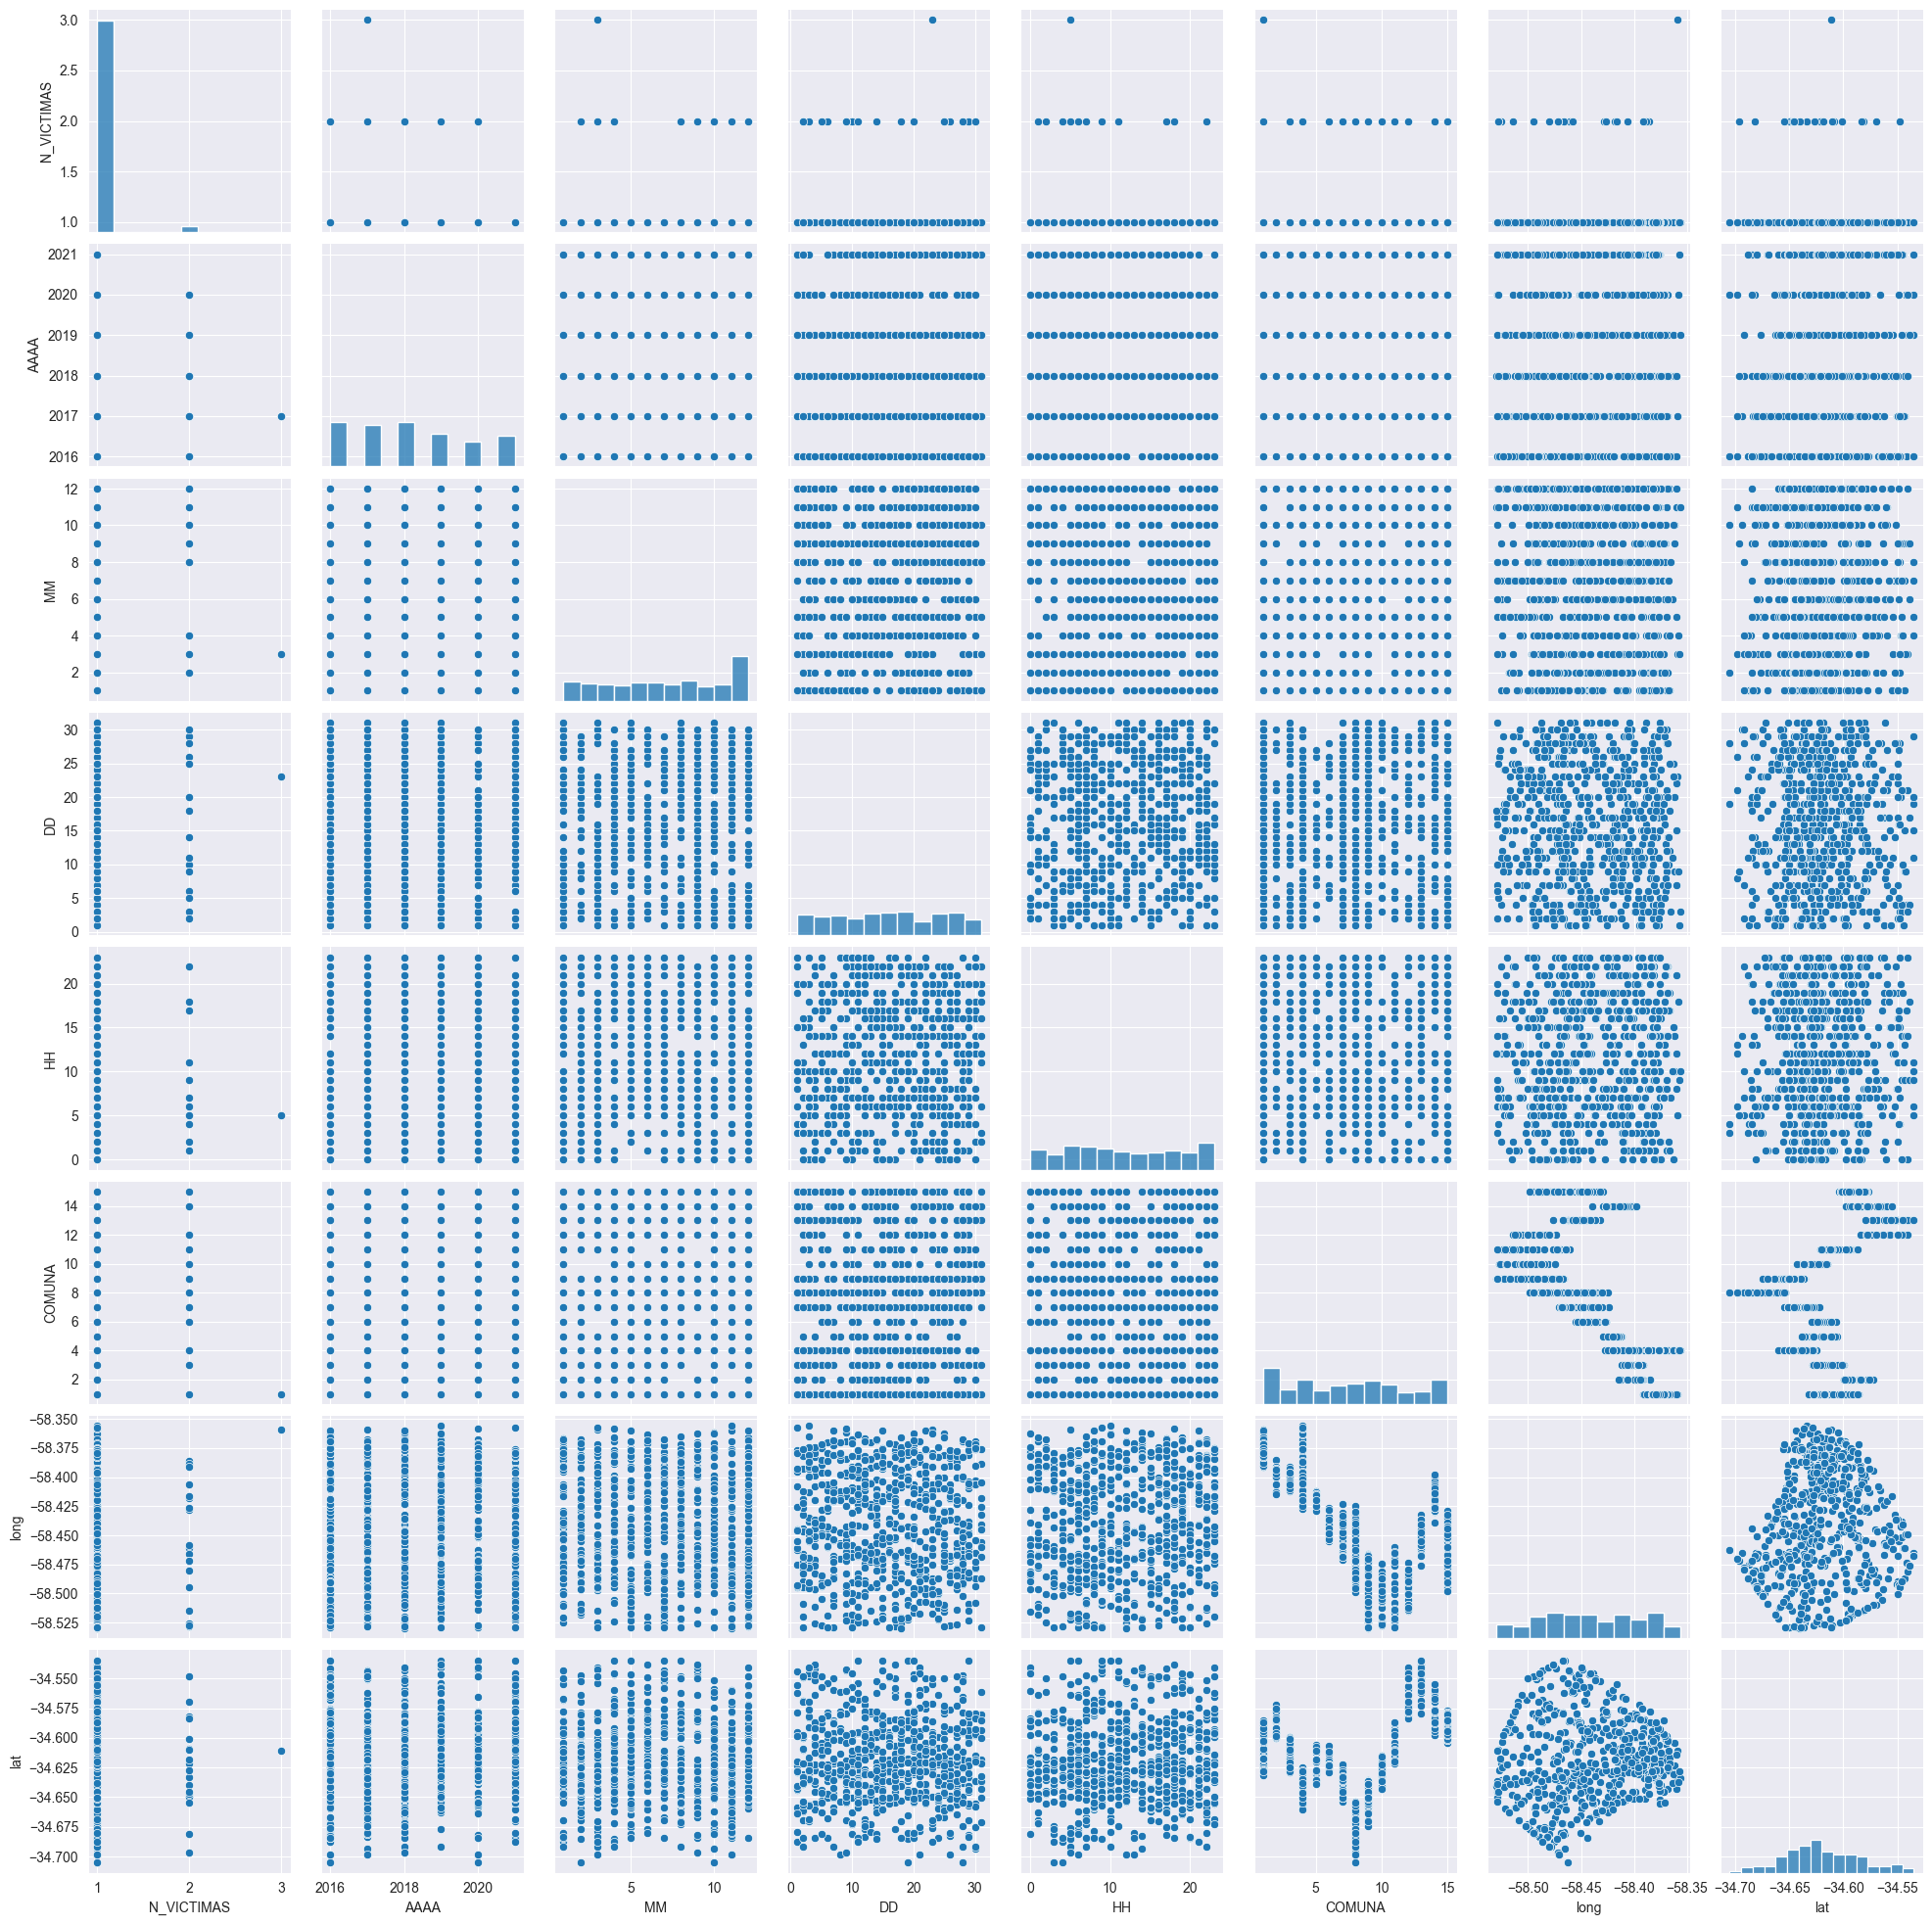

In [67]:
sns.pairplot(df);                               

En los gráficos anteriores observamos claramente que no hay correlación entre las variables numéricas (ya sean contínuas o discretas). Se observa como Latitud y longitud forman una figura similar al mapa de la ciudad de Buenos Aires. <br>
Esto nos permite concluir que no hay relaciones, al menos lineales, entre las variables analizadas. <br>
Veamos esto con más detalle en una matriz de correlación graficada con heatmap:

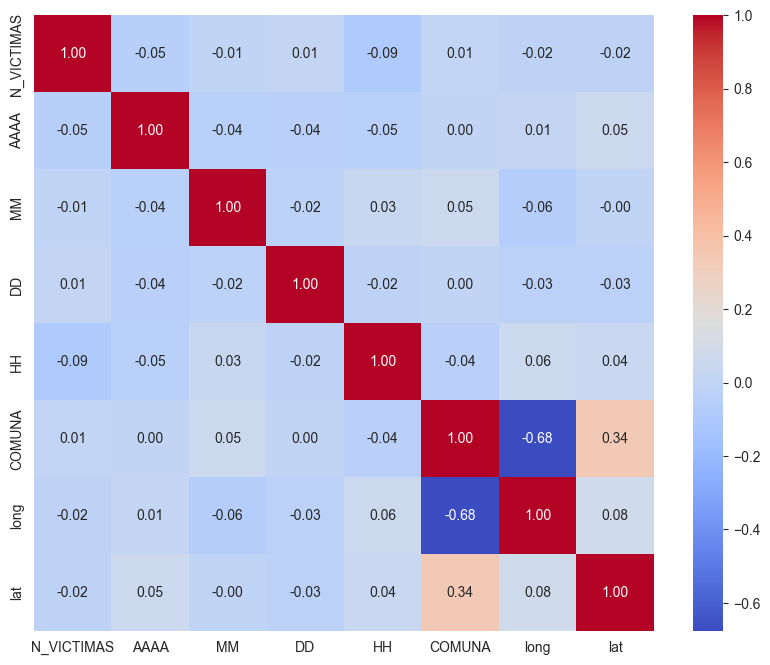

In [68]:
columnas_numericas = df.select_dtypes(include='number').columns
corr_matrix = df[columnas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Como vemos en el mapa de calor anterior, no hay correlación (valores casi 0) entre ninguna variable. Solamente hay alguna correlación entre comuna y latitud o comuna y longitud, debido a que las comunas son definidas por áreas geográficas que incluyen un conjunto de valores de latitudes y longitudes, pero es una relación que no es de importancia en el análisis.

Pasemos la columna FECHA a tipo de dato Datetime

In [69]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

Veamos estadísticas generales de las Fecha y Número de víctimas

In [70]:
df[['FECHA', 'N_VICTIMAS']].describe()

,FECHA,N_VICTIMAS
count,694,694.000000
mean,2018-09-16 01:52:02.766570496,1.030259
min,2016-01-01 00:00:00,1.000000
25%,2017-04-04 18:00:00,1.000000
50%,2018-07-14 12:00:00,1.000000
75%,2020-01-04 18:00:00,1.000000
max,2021-12-30 00:00:00,3.000000
std,NaN,0.179644


Allí vemos que tenemos nuestros datos en el rango de fechas de 01/01/2016 a 30/12/2021, y que los números de víctimas están entre 1 y 3. Esto ya lo habíamos observado en el ETL y nos indica que no tenemos outliers en estas columnas.

Comencemos a analizar las variables, iniciamos con N_VICTIMAS, correspondiente al número de víctimas en el siniestro.

In [71]:
df['N_VICTIMAS'].value_counts()

N_VICTIMAS
1    674
2     19
3      1
Name: count, dtype: int64

A continuación realizamos un gráfico de barras para observar la frecuencia del número de víctimas.

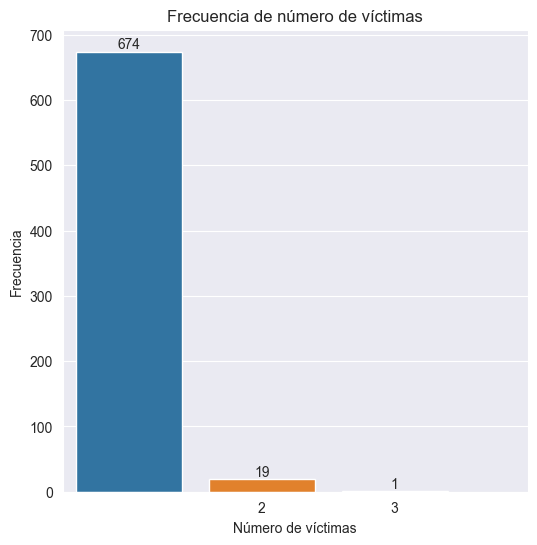

In [72]:
plt.figure(figsize=(6,6))
bar = sns.barplot(x= df['N_VICTIMAS'].value_counts().index, y=df['N_VICTIMAS'].value_counts().values )

bar.bar_label(bar.containers[0], fmt='%d', label_type='edge')
plt.xticks([1,2,3])
plt.title('Frecuencia de número de víctimas')
plt.ylabel('Frecuencia')
plt.xlabel('Número de víctimas')
plt.show()

Si realizamos un boxplot para observar outliers, veremos que los números de víctimas 2 y 3 aparecerán señalados como outliers. <br>
Esto es claro si tenemos en cuenta que tanto el cuartil 1 (Q1), la mediana y el cuartil 3 (Q3) corresponden al  valor N_VICTIMAS == 1, por lo tanto el rango intercuartílico es 0 (Q3 - Q1 = 0). De esta manera, si calculamos el límite máximo como: <br>
lim_max = Q3 + IQR = 1 + 0 = 1 <br>
Esto indica que todos los valores con N_VICTIMAS > 1 serán considerados outliers en el boxplot.

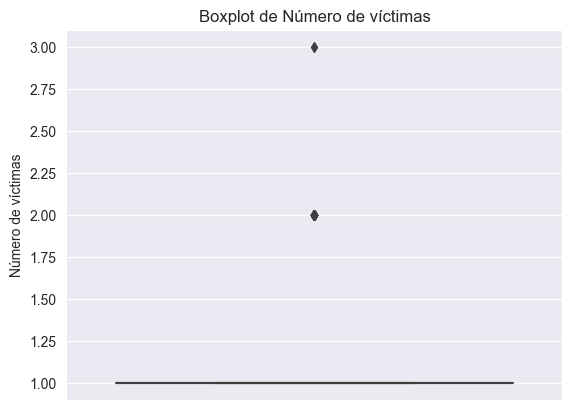

In [73]:
sns.boxplot(df['N_VICTIMAS'])
plt.title('Boxplot de Número de víctimas')
plt.ylabel('Número de víctimas')
plt.tick_params(axis='x', labelbottom=False) 
plt.show()

Sin embargo, son outliers reales (no errores). <br>
Vemos que hay tres valores para la variable N_VICTIMAS. La gran mayoría de los siniestros tiene una víctima fatal. <br>

Aprovechamos este espacio para realizar gráficas de boxplot en el resto de las variables:

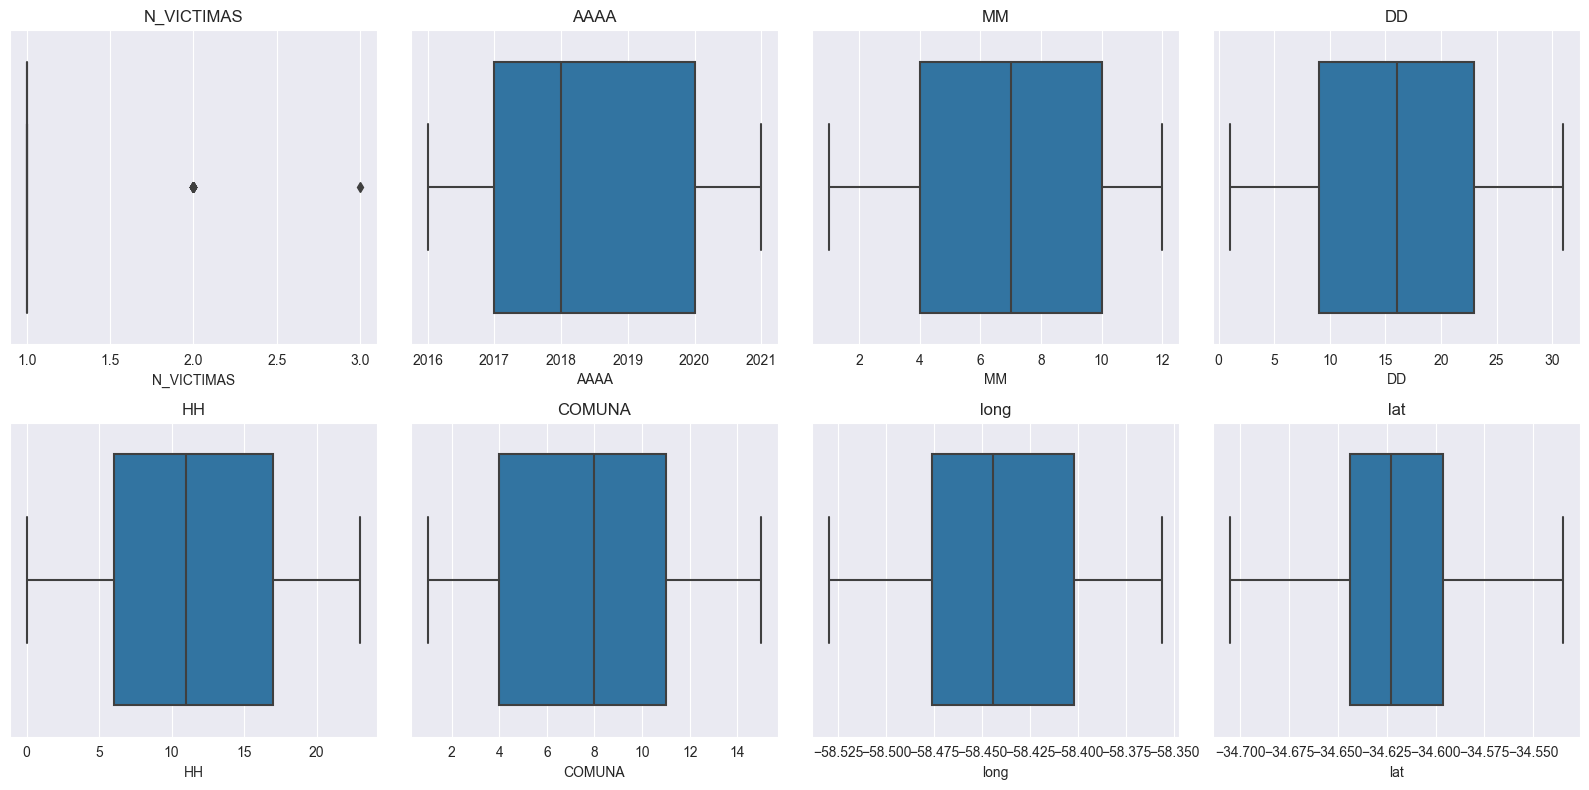

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=df[col], ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)

plt.tight_layout()
plt.show()

Como vemos, además de N_VICTIMAS que fue analizado particularmente antes, no hay outliers en ninguna de las variables.

Exploremos ahora la relación entre los accidentes y las fechas. <br>
Veamos inicialmente cómo se ditribuyeron los accidentes a lo largo del tiempo.

In [75]:
df.groupby('FECHA').agg({'ID': 'count'}).cumsum().reset_index().rename(columns={'ID': 'Cantidad acumulada'})

,FECHA,Cantidad acumulada
0,2016-01-01,1
1,2016-01-02,2
2,2016-01-03,3
3,2016-01-10,4
4,2016-01-21,5
...,...,...
593,2021-12-12,690
594,2021-12-13,691
595,2021-12-15,692
596,2021-12-20,693


A continuación vamos a graficar la cantidad de accidentes acumulados en función de la fecha.

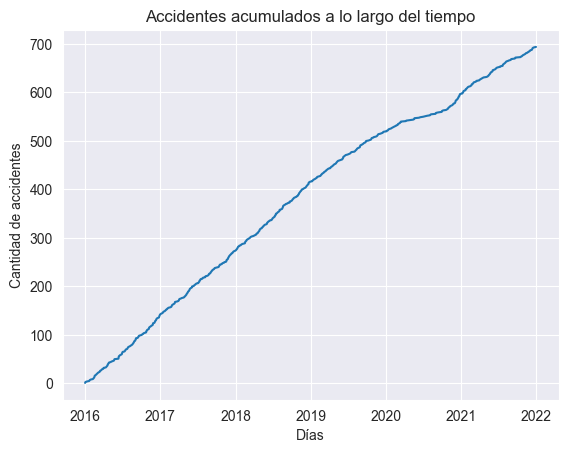

In [15]:
df_grouped_acum = df.groupby('FECHA').agg({'ID': 'count'}).cumsum().reset_index().rename(columns={'ID': 'Cantidad acumulada'})
sns.lineplot(data= df_grouped_acum, x= 'FECHA', y= 'Cantidad acumulada')
plt.title('Accidentes acumulados a lo largo del tiempo')
plt.xlabel('Días')
plt.ylabel('Cantidad de accidentes')
plt.show()

En la gráfica anterior vemos que, excepto por el intervalo (2020, 2021), hay una relación lineal perfecta entre la cantidad de accidentes acumulados y los días. Esto indica que la cantidad de accidentes por día se mantiene constante (la pendiente de la recta). <br>
La desviación en el año 2020 se debe a la disminución en el tránsito debido a las medidas de aislamiento tomadas durante la pandemia. <br>
Analicemos un poco más en detalle, calculando la pendiente antes de 2020 y durante el periodo marzo (comienzo del aislamiento) a noviembre (las personas comienzan a circular nuevamente independientemente de la órdenes de aislamiento) de 2020.

In [16]:
# Calculemos la pendiente antes de la pandemia
X = (df_grouped_acum[df_grouped_acum['FECHA'] < '2020-03-20']['FECHA'] - df_grouped_acum['FECHA'].min()).dt.days    # obtenemos valores de X
ind = df_grouped_acum[df_grouped_acum['FECHA'] < '2020-03-20']['FECHA'].idxmax()        # calculamos el indice de la ultima fecha con accidentes
lin1 = LinearRegression()                                                               # instanciamos el modelo
lin1.fit(X.array.reshape(-1, 1), df_grouped_acum.loc[:ind,:]['Cantidad acumulada'])                 # entrenamos
pend = lin1.coef_[0] 
print(f'La pendiente antes de 20-03-2020 es de {round(pend, 2)}')                                   # obtenemos la pendiente

La pendiente antes de 20-03-2020 es de 0.37


In [17]:
# Calculemos la pendiente durante el período de mayor aislamiento (20-03-2020 a 01-11-2020)
filtro = (df_grouped_acum['FECHA'] >= '2020-03-20') & (df_grouped_acum['FECHA'] <= '2020-11-01')
X = (df_grouped_acum[filtro]['FECHA'] - datetime.strptime('2020-03-20', '%Y-%m-%d')).dt.days    # obtenemos valores de X
ind2 = df_grouped_acum[df_grouped_acum['FECHA'] >= '2020-11-01']['FECHA'].idxmin()
lin2 = LinearRegression()                                                               # instanciamos el modelo
lin2.fit(X.array.reshape(-1, 1), df_grouped_acum.loc[ind+1:ind2,:]['Cantidad acumulada'])                 # entrenamos
pend2 = lin2.coef_[0] 
print(f'La pendiente durante el aislamiento máximo es de {round(pend2, 2)}')                                   # obtenemos la pendiente

La pendiente durante el aislamiento máximo es de 0.12


En el análisis realizado podemos ver claramente cómo pasamos de una tasa de 0.37 accidentes por día antes de la pandemia, a una tasa de 0.12 accidentes por día durante la etapa de máximo aislamiento de 2020. Es decir, la cantidad de accidentes diarios se redujo en más de 3 veces.

Exploremos ahora cómo los accidentes se distribuyen con respecto al mes.

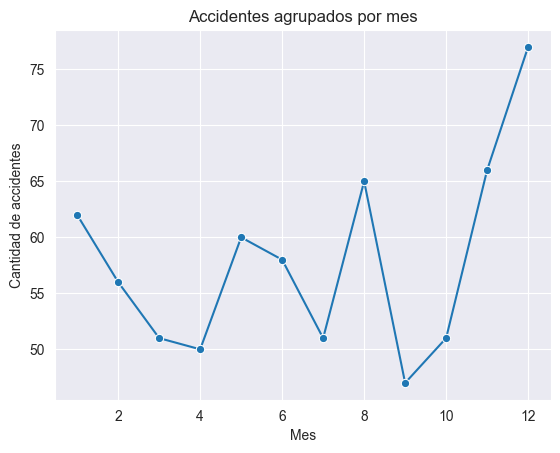

In [18]:
df_grouped_m = df.groupby('MM').agg({'ID': 'count'}).reset_index()
sns.lineplot(data= df_grouped_m, x='MM', y='ID', marker= 'o')
plt.title('Accidentes agrupados por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de accidentes')
plt.show()

Podemos observar en la gráfica anterior que hay un pico muy notorio de accidentes en Diciembre. Este pico comienza en Noviembre y retoma la tendencia normal en Enero. Esto puede deberse a que en verano hay una mayor movilización por vacaciones.<br>
El resto de las tendencias pueden ser a analizar, por ejemplo el máximo parcial en Agosto. <br>
Exploremos la cantidad de accidentes por día del mes:

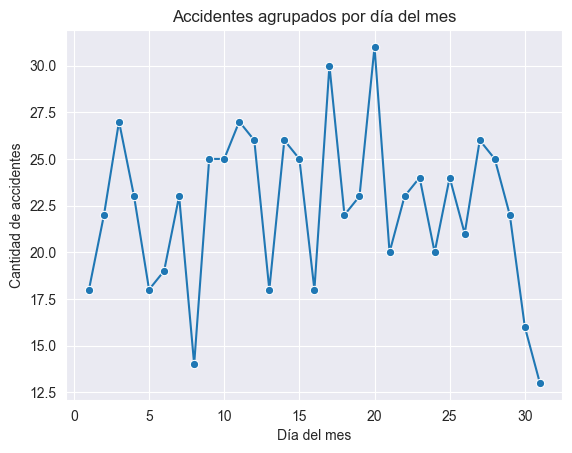

In [19]:
df_grouped_d = df.groupby('DD').agg({'ID': 'count'}).reset_index().rename(columns={'ID': 'Cantidad de accidentes'})
sns.lineplot(data= df_grouped_d, x= 'DD', y='Cantidad de accidentes', marker= 'o')
plt.title('Accidentes agrupados por día del mes')
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de accidentes')
plt.show()

La tendencia no es muy clara en este caso. Podemos ver que hay dos picos los días 17 y 20, y un mínimo los días 8 del mes. <br>
A continuación veamos cómo se distancian de la media.

In [20]:
media = round(df_grouped_d["Cantidad de accidentes"].mean(), 2)
stdev= round(df_grouped_d["Cantidad de accidentes"].std(), 2)
acc_17 = df_grouped_d[df_grouped_d["DD"] == 17 ]["Cantidad de accidentes"].values[0]
acc_20 = df_grouped_d[df_grouped_d["DD"] == 20 ]["Cantidad de accidentes"].values[0]
acc_8 = df_grouped_d[df_grouped_d["DD"] == 8 ]["Cantidad de accidentes"].values[0]
print(f'Media de accidentes agrupados por día: {media}')
print(f'Desviación estándar de accidentes agrupados por día: {stdev}')
print(f'Accidentes los días 17: {acc_17}, son un {round((acc_17 - media)*100/media, 2)} más frecuentes. Se desvían {round((acc_17 - media)/stdev, 2)} desviaciones estándar de la media. Valor p: {round(1 - norm.cdf((acc_17 - media)/stdev), 2)}')
print(f'Accidentes los días 20: {acc_20}, son un {round((acc_20 - media)*100/media, 2)} más frecuentes. Se desvían {round((acc_20 - media)/stdev, 2)} desviaciones estándar de la media. Valor p: {round(1 - norm.cdf((acc_20 - media)/stdev), 2)}')
print(f'Accidentes los días 8: {acc_8}, son un {round((media - acc_8)*100/media, 2)} menos frecuentes. Se desvían {round((media - acc_8)/stdev, 2)} desviaciones estándar de la media. Valor p: {round(1 - norm.cdf((abs(acc_8 - media))/stdev), 2)}')

Media de accidentes agrupados por día: 22.39
Desviación estándar de accidentes agrupados por día: 4.28
Accidentes los días 17: 30, son un 33.99 más frecuentes. Se desvían 1.78 desviaciones estándar de la media. Valor p: 0.04
Accidentes los días 20: 31, son un 38.45 más frecuentes. Se desvían 2.01 desviaciones estándar de la media. Valor p: 0.02
Accidentes los días 8: 14, son un 37.47 menos frecuentes. Se desvían 1.96 desviaciones estándar de la media. Valor p: 0.02


Podemos decir que los picos encontrados gráficamente se desvían significativamente de la media. <br>
El mínimo de los días 31 no es significativo ya que no todos los meses tienen 31 días por lo que es de esperar que haya menos cantidad de accidentes. <br>

Veamos ahora la relación entre la cantidad de accidentes y el día de la semana:

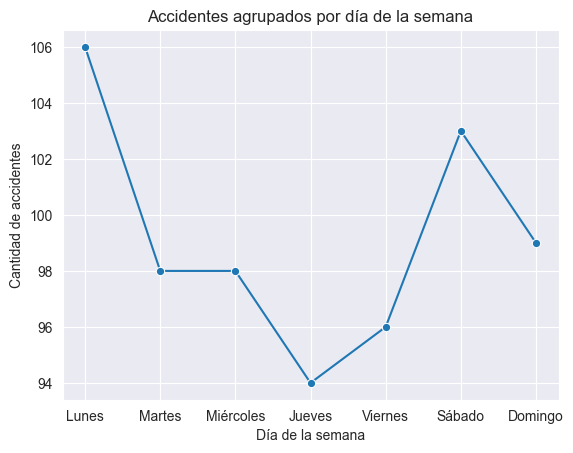

In [21]:
df['DIA_SEM'] = df['FECHA'].dt.weekday
df_grouped_ds = df.groupby('DIA_SEM').agg({'ID': 'count'}).reset_index()
sns.lineplot(data= df_grouped_ds, x= 'DIA_SEM', y='ID', marker= 'o')
plt.title('Accidentes agrupados por día de la semana')
plt.xlabel('Día de la semana')
x_values = [0, 1, 2, 3, 4, 5, 6]

dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

plt.xticks(x_values, dias_semana)
plt.ylabel('Cantidad de accidentes')
plt.show()

En este caso la tendencia es muy clara. Los días lunes presentan un máximo absoluto muy marcado, y el día sábado es un máximo relativo. Los días Jueves, en cambio son claramente un mínimo. <br>
Exploremos la tendencia de los accidentes con respecto a la hora del día.

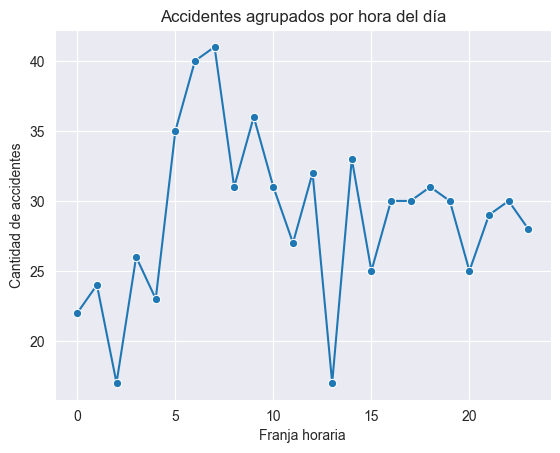

In [22]:
df['HH'].replace('SD', np.nan, inplace=True)
df_grouped_h = df.groupby('HH').agg({'ID': 'count'}).reset_index()
sns.lineplot(data= df_grouped_h, x= 'HH', y='ID', marker= 'o')
plt.title('Accidentes agrupados por hora del día')
plt.xlabel('Franja horaria')
plt.ylabel('Cantidad de accidentes')
plt.show()

Vemos un máximo muy evidente a las 6 y 7 de la mañana. Esto puede deberse al horario en que se suelen movilizar las personas para ir al trabajo. <br>
Por otro lado hay dos mínimos marcados, a las 3 de la mañana, horario en el que hay mucho menos movimiento, y a las 13, horario probablemente relacionado con el almuerzo.

Los días lunes son los que más accidentes ocurren. Veamos ese día en particular cómo es la distribución horaria de los accidentes

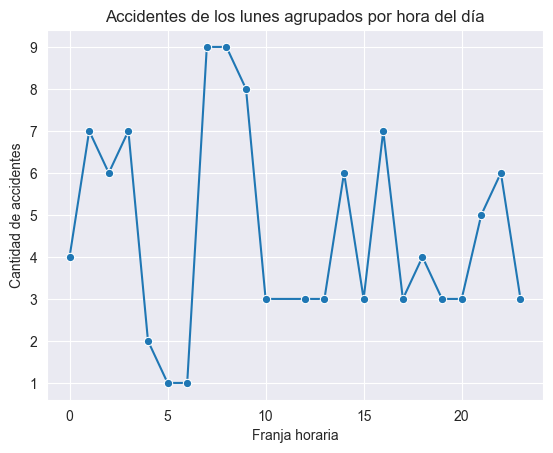

In [23]:
df_lunes = df[df['DIA_SEM'] == 0]
df_lunes_grouped = df_lunes.groupby('HH').agg({'ID': 'count'}).reset_index()
sns.lineplot(data= df_lunes_grouped, x= 'HH', y='ID', marker= 'o')
plt.title('Accidentes de los lunes agrupados por hora del día')
plt.xlabel('Franja horaria')
plt.ylabel('Cantidad de accidentes')
plt.show()

En la gráfica anterior podemos apreciar cómo los lunes se nota muy clara la tendencia de mayor cantidad de accidentes entre las 7 y las 9 am. No se refleja el mínimo a las 13 hs como en la gráfica de accidentes por franja horaria.

Ahora, analicemos los accidentes con respecto al tipo de calle:

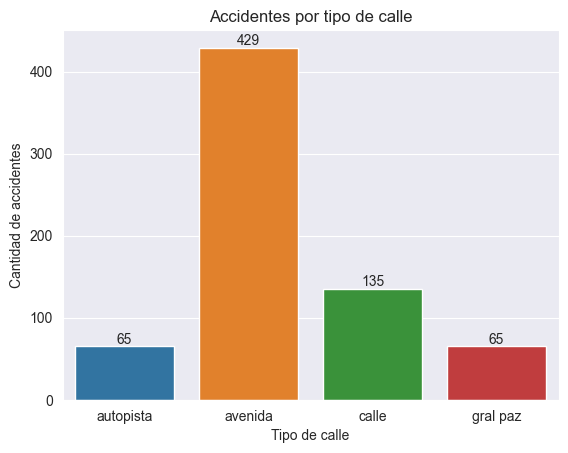

In [24]:
df_grouped_calle = df.groupby('TIPO_DE_CALLE').agg({'ID': 'count'}).reset_index()
bar = sns.barplot(data=df_grouped_calle, x='TIPO_DE_CALLE', y= 'ID')
bar.bar_label(bar.containers[0], fmt='%d', label_type='edge')
plt.title('Accidentes por tipo de calle')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Tipo de calle')
plt.show()

Como vemos, la gran mayoría de los accidentes con víctimas fatales ocurren en tipos de calle Avenida. Esto puede deberse a la mayor velocidad de circulación en las avenidas respecto a las calles. En las autopistas, si bien la velocidad puede ser mayor, el tránsito es más ordenado, con menos cortes por cruces peatonales  o calles.

Veamos ahora la reación con las comunas. Primero es necesario corregir los datos que corresponden a comuna 0, ya que no es una comuna de Capital Federal. Primero recordemos que tenemos comunas de 1 a 15:

In [25]:
comunas = sorted(df['COMUNA'].unique().tolist())
print(comunas)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


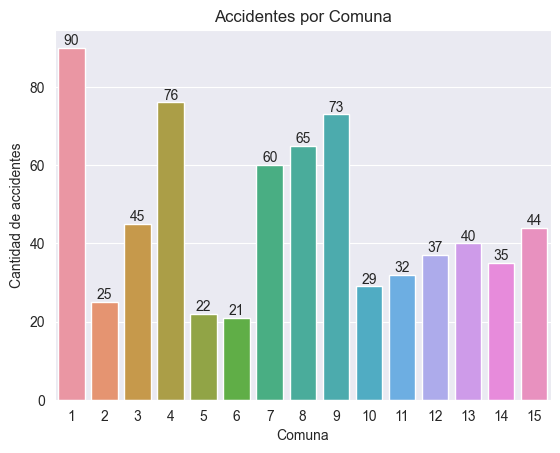

In [26]:
df_grouped_com = df.groupby('COMUNA').agg({'ID': 'count'}).reset_index()
bar = sns.barplot(data=df_grouped_com, x='COMUNA', y= 'ID')
bar.bar_label(bar.containers[0], fmt='%d', label_type='edge')
plt.title('Accidentes por Comuna')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Comuna')
plt.show()

Vemos mayor frecuencia de accidentes en la columna 1, y una frecuencia también por encima de la media en las comunas 4, 7, 8 y 9. <br>
Esto podemos observarlo mejor procesando un poco más los datos y realizando el siguiente gráfico:

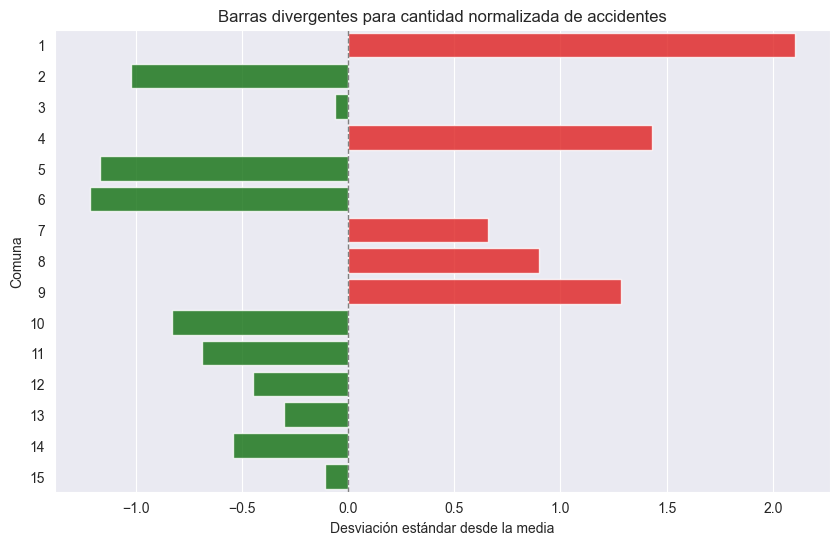

In [27]:
media = np.mean(df_grouped_com['ID'])
std = np.std(df_grouped_com['ID'])
df_grouped_com['cant_norm'] = (df_grouped_com['ID'] - media) / std
colors = df_grouped_com['cant_norm'].apply(lambda x: 'red' if x > 0 else 'green').tolist()
plt.figure(figsize=(10, 6))
sns.barplot(x='cant_norm', y='COMUNA', data=df_grouped_com, orient='h', palette=colors, alpha= 0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  
plt.xlabel('Desviación estándar desde la media')
plt.ylabel('Comuna')
plt.title('Barras divergentes para cantidad normalizada de accidentes')
plt.show()

En el gráfico de barras divergentes, podemos observar cómo las comunas que más se desvían respecto a la media son las enumeradas anteriormente. Aquí podemos ver también con más claridad las comunas que menos accidentes tienen (en verde, hacia la izquierda).

Analicemos la cantidad acumulada de accidentes por comuna. De esta manrea podremos comparar las pendientes de cada recta y ver cómo se diferencian en la tasa de accidentes por día.

In [28]:
df_grouped_com

,COMUNA,ID,cant_norm
0,1,90,2.102348
1,2,25,-1.022331
2,3,45,-0.060891
3,4,76,1.429340
4,5,22,-1.166547
5,6,21,-1.214619
6,7,60,0.660189
7,8,65,0.900549
8,9,73,1.285124
9,10,29,-0.830043


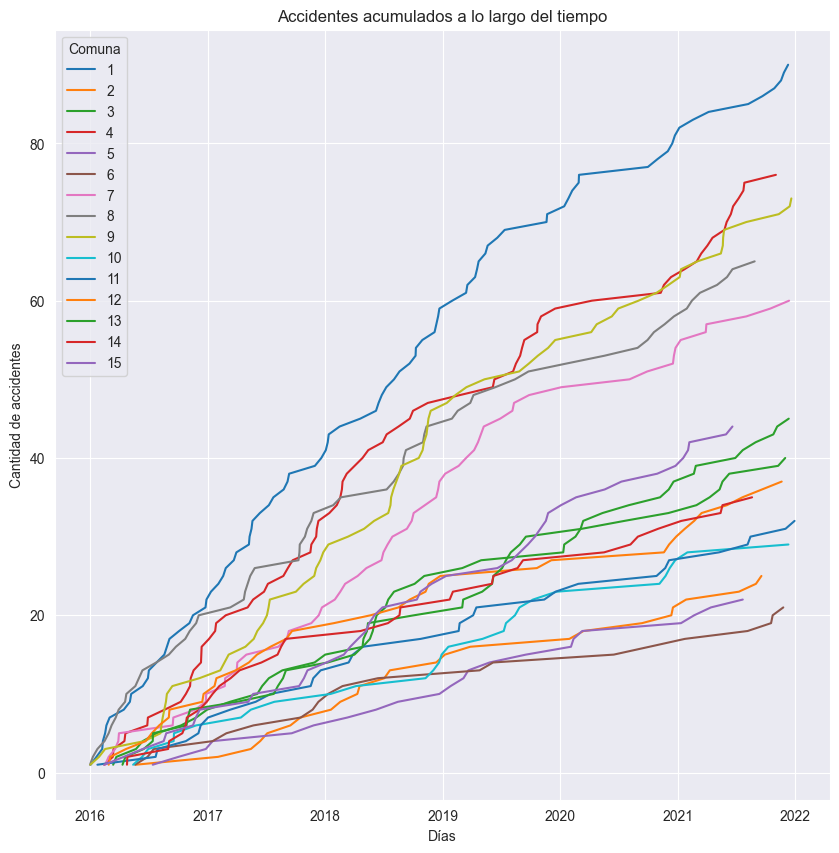

In [29]:
df_grouped_com_2 = df.groupby(['COMUNA', 'FECHA']).agg({'ID': 'count'}).rename(columns={'ID': 'Cantidad acumulada'}).reset_index()
df_grouped_com_2['Cantidad acumulada'] = df_grouped_com_2.groupby('COMUNA')['Cantidad acumulada'].cumsum()

plt.figure(figsize=(10,10))
for comuna in comunas:
    sns.lineplot(data= df_grouped_com_2[df_grouped_com_2['COMUNA'].isin([comuna])], x= 'FECHA', y= 'Cantidad acumulada', label=comuna)
plt.legend(title='Comuna')
plt.title('Accidentes acumulados a lo largo del tiempo')
plt.xlabel('Días')
plt.ylabel('Cantidad de accidentes')
plt.show()

Analicemos ahora el tipo de vehículo que ocupaba la víctima (variable 'VICTIMA' en el dataset).

In [30]:
df['VICTIMA'].value_counts()

VICTIMA
moto           295
peaton         263
auto            83
bicicleta       29
cargas           7
pasajeros        5
movil            2
objeto fijo      1
peaton_moto      1
Name: count, dtype: int64

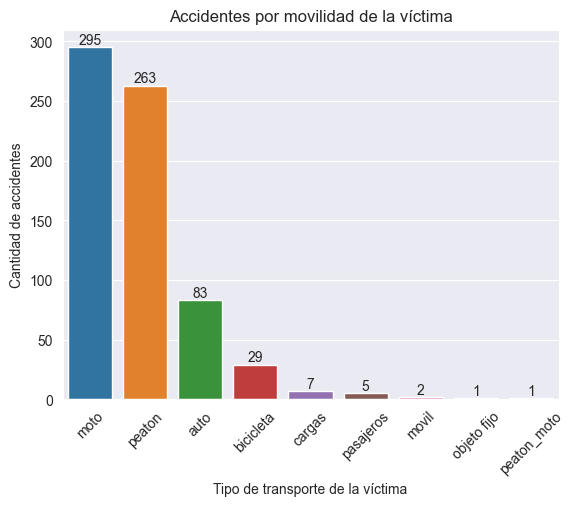

In [31]:
victima_counts = df['VICTIMA'].value_counts()
bar = sns.barplot(x=victima_counts.index, y=victima_counts.values)
bar.bar_label(bar.containers[0], fmt='%d', label_type='edge')
plt.title('Accidentes por movilidad de la víctima')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Tipo de transporte de la víctima')
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)
plt.show()

Vemos claramente que moto y peatón son los tipos de transporte con más víctimas. <br>
Analicemos si hay alguna tendencia diferente en cuanto a horarios para los tipos de víctimas.

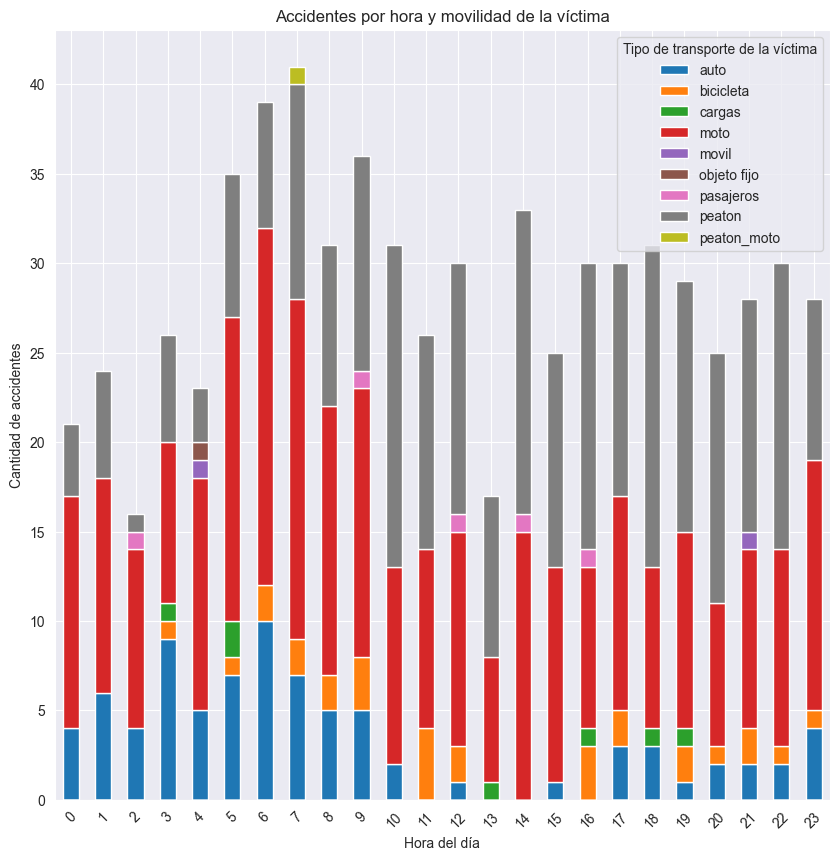

In [32]:
df_group_vict_hh = df.groupby(['VICTIMA', 'HH']).size().reset_index(name='Cantidad')
df_group_vict_hh['HH'] = df_group_vict_hh['HH'].astype(int)
pivot_table = df_group_vict_hh.pivot_table(index='HH', columns='VICTIMA', values='Cantidad', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(10,10))

plt.title('Accidentes por hora y movilidad de la víctima')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Hora del día')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.legend(title='Tipo de transporte de la víctima')

plt.show()

Podemos observar que el tipo de víctima 'moto' es prácticamente constante a lo largo del día. Sin embargo, el resto de los transportes muestran una tendencia más marcada. Por ejemplo, los accidentes en auto, luego de las 10 AM son menores y nunca vuelven al pico de las 6 AM. <br>
Por otro lado, las víctimas 'peatones' son pocas durante el lapso de las 0 hasta las 4 AM, luego aumentan y se mantienen constantes hasta las 23.

Analicemos cómo se ditribuyen geográficamente los accidentes.

Ahora, generemos un mapa, utilizando la librería plotly.express, en la cual se observe la distribución de los siniestros. En el primer mapa veremos con distintos colores los siniestros según el medio de transporte de la víctima.

In [33]:
fig = px.scatter_mapbox(df, lat="lat", lon="long", color="VICTIMA", zoom=10)
fig.update_layout(mapbox_style="open-street-map", width=1000, height=1000)
fig.show()


Podemos ver que los accidentes en los que la víctima era un peatón, tienen una mayor frecuencia en ciertas zonas, en general avenidas. <br>
Por ejemplo:
- Alrededor de Av. 9 de Julio y Av. Independencia 
- Av. 9 de Julio entre Corrientes y Córdoba
- Av. L.N. Alem entre Corrientes y Córdoba
- Alrededor de plaza Constitución 

Así mismo, podemos observar que los accidentes en los que la víctima fatal se transportaba en auto prácticamente no ocurren en el microcentro, sino en por fuera de Avenida Corrientes y Avenida Juan B. Justo. Esto puede deberse a la diferencia en las velocidades de conducción. <br>
Estos insights serán explorados luego en la herramienta de visualización.


Grafiquemos un mapa de densidad de calor para poder observar con más claridad las zonas con mayor cantidad de accidentes.

In [34]:
fig = px.density_mapbox(df, lat="lat", lon="long", radius=10,
                        mapbox_style="carto-positron", zoom=10,
                        labels={'latitud':'Latitud', 'longitud':'Longitud'},
                        center={"lat": -34.6135, "lon": -58.44035})
fig.update_layout(mapbox_style="open-street-map", width=1000, height=1000)
fig.show()


Podemos ver con más facilidad en el mapa anterior, las zonas con mayor cantidad de accidentes.

Vamos a agregar al análisis el dataset correspondiente a los datos de las víctimas.

In [76]:
df_vic = pd.read_excel('Datasets/homicidios.xlsx', sheet_name='VICTIMAS')
df_vic.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Veamos las ultimas filas:

In [77]:
df_vic.tail()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00
716,2021-0096,2021-12-15,2021,12,15,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20 00:00:00


Veamos información general del dataframe:

In [78]:
df_vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


Veamos si hay duplicados

In [79]:
df_vic.duplicated().sum()

0

Veamos los valores faltantes

In [80]:
df_vic.isna().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

Pasemos todo a minúsculas y reemplacemos los posibles valores faltantes por np.nan:

In [81]:
df_vic = df_vic.applymap(lambda x: x.lower() if isinstance(x, str) else x)
faltantes = ['', ' ', '.', '...', 'sd']
df_vic.replace(faltantes, np.nan, inplace=True)
df_vic.isna().sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

La columna FECHA_FALLECIMIENTO no es de interés para nuestro análisis, por lo que es eliminada.

In [82]:
df_vic.drop(columns='FECHA_FALLECIMIENTO', inplace=True)

Veamos los posibles valores de 'ROL'

In [84]:
df_vic['ROL'].value_counts()

ROL
conductor               330
peaton                  267
pasajero_acompañante     80
ciclista                 29
Name: count, dtype: int64

Veamos si hay correlación entre las variables de este dataframe:

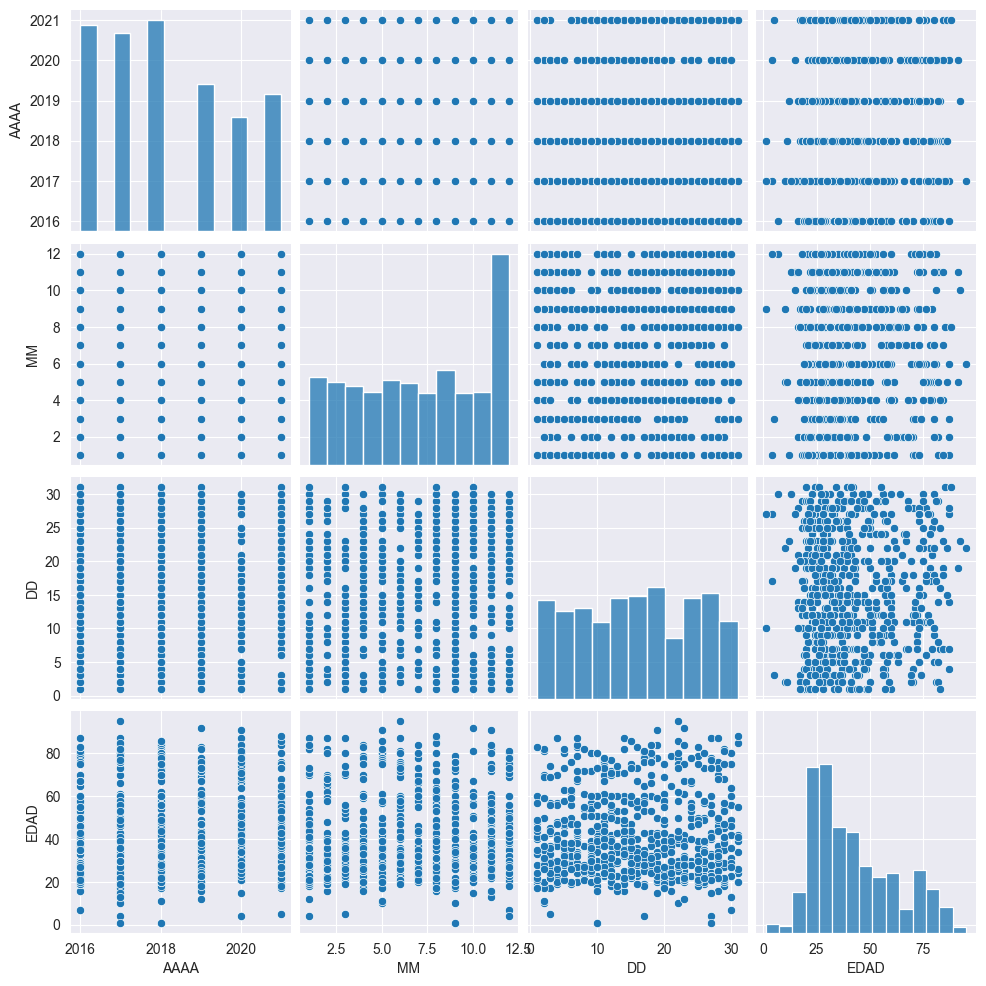

In [86]:
sns.pairplot(df_vic);

Es claro que no hay correlación entre las variables edad y fechas. Veamos el mapa de calor:

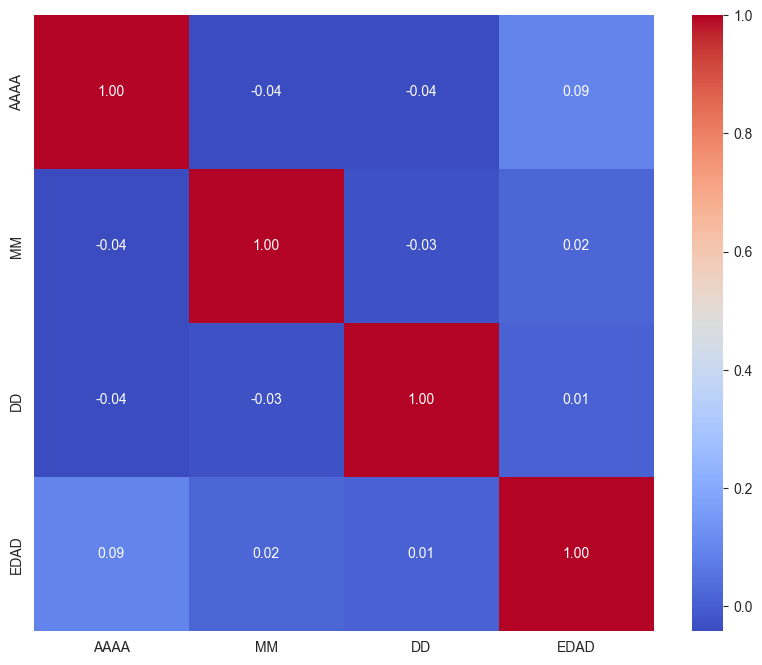

In [87]:
columnas_numericas = df_vic.select_dtypes(include='number').columns
corr_matrix = df_vic[columnas_numericas].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Como anticipamos, ningún tipo de correlación. <br>
Veamos ahora outliers:

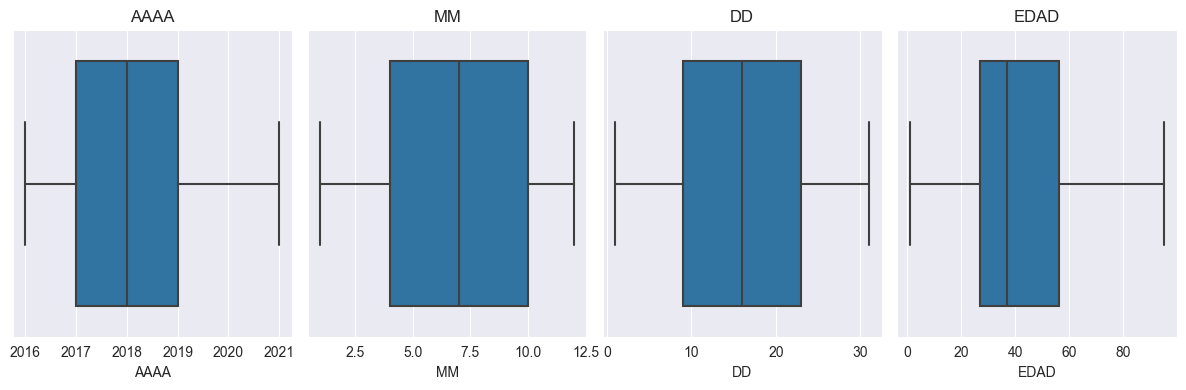

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=df_vic[col], ax=axes[i%4])
    axes[i%4].set_title(col)

plt.tight_layout()
plt.show()

Vemos que no hay outliers en ninguna variable numérica.

Los datos nuevos a analizar en este dataset corresponden a rol, sexo y edad. Comencemos por Rol.

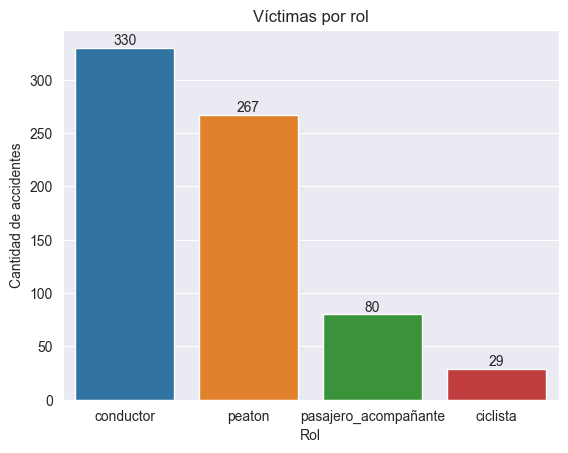

In [94]:
bar = sns.barplot(x=df_vic['ROL'].value_counts().index, y=df_vic['ROL'].value_counts().values)
bar.bar_label(bar.containers[0], fmt='%d', label_type='edge')
plt.title('Víctimas por rol')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Rol')
bar.set_xticklabels(bar.get_xticklabels())
plt.show()

En la gráfica anterior podemos observar que las víctimas que no son peatones ni ciclistas, mucho más frecuentemente son conductores en vez de pasajeros acompañantes.

Analicemos ahora el los accidentes por sexo de la víctima.

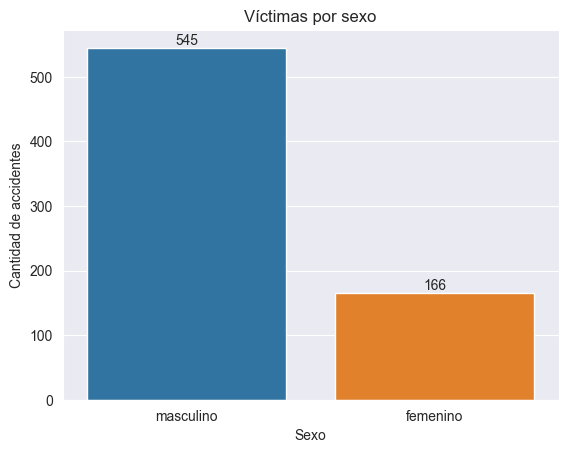

In [40]:
bar = sns.barplot(x=df_vic['SEXO'].value_counts().index, y=df_vic['SEXO'].value_counts().values)
bar.bar_label(bar.containers[0], fmt='%d', label_type='edge')
plt.title('Víctimas por sexo')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Sexo')
bar.set_xticklabels(bar.get_xticklabels())
plt.show()

Vemos que hay una mayor proporción de masculino, aproximadamente 3.28 veces más que víctimas femeninas. <br>
Veamos si hay alguna diferencia de distribución del sexo en cada rol:

In [41]:
df_vic_grouped = df_vic.groupby(['ROL', 'SEXO']).size().reset_index().rename(columns={0: 'Cantidad'})

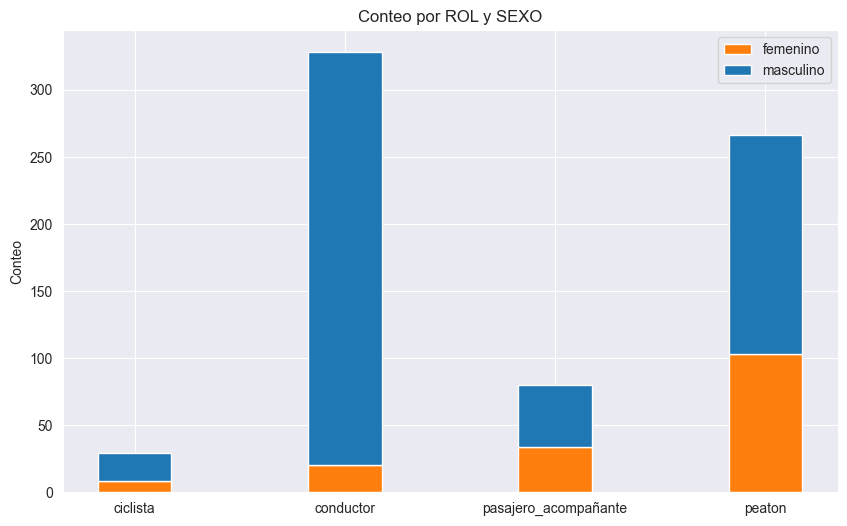

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

colores = ['#ff7f0e', '#1f77b4']

bar_width = 0.35
bar_bottom = [0] * len(df_vic_grouped['ROL'].unique())
for i, sexo in enumerate(df_vic_grouped['SEXO'].unique()):
    filtro_sexo = df_vic_grouped['SEXO'] == sexo
    datos_sexo = df_vic_grouped[filtro_sexo]
    for j, rol in enumerate(datos_sexo['ROL']):
        conteo = datos_sexo.iloc[j]['Cantidad']
        if j == 0:
            ax.bar(rol, conteo, bar_width, label=sexo, bottom=bar_bottom[j], color=colores[i % len(colores)])
            bar_bottom[j] += conteo
        else:
            ax.bar(rol, conteo, bar_width, bottom=bar_bottom[j], color=colores[i % len(colores)])
            bar_bottom[j] += conteo

ax.set_ylabel('Conteo')
ax.set_title('Conteo por ROL y SEXO')
ax.legend()

# Mostrar el gráfico
plt.show()



En la gráfica anterior vemos una muy marcada diferencia en la proporción de víctimas masculinas que son conductores, con respecto a las femeninas. De hecho, en valores absolutos, la cantidad de mujeres que mueren como conductoras son menores a las que mueren como acompañantes.
En el caso de los peatones la diferencia no es casi significativa. En el caso de los ciclistas también se nota una mayor proporción de masculinos, pero no llega a ser tan marcada como en el caso de conductores.

Analicemos ahora la edad de las víctimas.

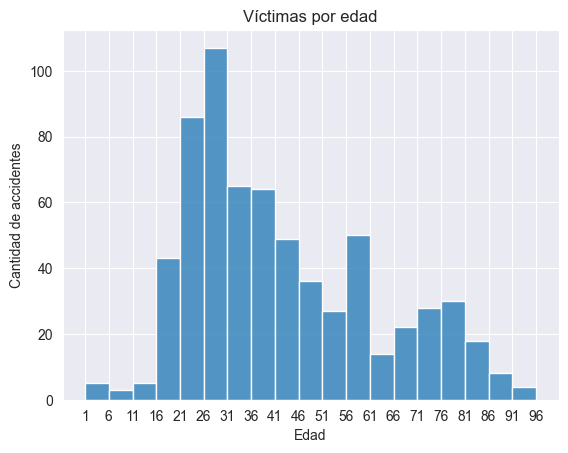

In [43]:
binwidth = 5

sns.histplot(df_vic['EDAD'], bins=range(int(min(df_vic['EDAD'])), int(max(df_vic['EDAD'])) + binwidth, binwidth))

plt.xticks(range(int(min(df_vic['EDAD'])), int(max(df_vic['EDAD'])) + binwidth, binwidth))

plt.title('Víctimas por edad')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Edad')

plt.show()


Como podemos observar, las edades de 26 a 31 años son las que más accidentes tienen, seguidas por las edades de 21 a 26.

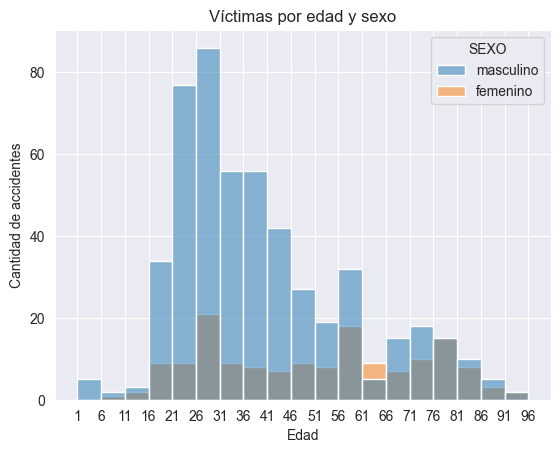

In [44]:
binwidth = 5

sns.histplot(data= df_vic, x=df_vic['EDAD'], bins=range(int(min(df_vic['EDAD'])), int(max(df_vic['EDAD'])) + binwidth, binwidth), hue='SEXO')

plt.xticks(range(int(min(df_vic['EDAD'])), int(max(df_vic['EDAD'])) + binwidth, binwidth))

plt.title('Víctimas por edad y sexo')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Edad')

plt.show()

En la gráfica anterior podemos ver que entre 16 y 61 años, la cantidad de víctimas de sexo masculino es mucho mayor que la de sexo femenino. A partir de los 61 años comienza a ser más pareja, incluso siendo mayor la cantidad de femeninas en el rango 61-66. De los 76 años en adelante no podemos ver diferencias significativas entre sexos.<br>
Otro aspecto a destacar es que la cantidad absoluta de mujeres que mueren con edades entre 16 y 56 años es prácticamente constante (con un pico aproximadamente del doble entre 26 y 31). No sucede lo mismo en el caso de hombres, que presentan un gran aumento hasta los 31 años para luego ir reduciéndose paulatinamente.

Ahora juntemos los dataframes de hechos y víctimas para poder realizar gráficas que relacionen las variables que están en cada uno de ellos.

In [45]:
df_completo = df.merge(df_vic, how = 'left', left_on='ID', right_on= 'ID_hecho', suffixes=('', '_y'))
df_completo.drop(columns= ['FECHA_y', 'AAAA_y', 'MM_y', 'DD_y', 'VICTIMA_y', 'ID_hecho'], inplace=True)
df_completo.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,long,lat,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEM,ROL,SEXO,EDAD
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,av piedra buena y av fernandez de la cruz,avenida,8,-58.475340,-34.687570,moto-auto,moto,auto,4,conductor,masculino,19.0
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,av gral paz y av de los corrales,gral paz,9,-58.508775,-34.669777,auto-pasajeros,auto,pasajeros,5,conductor,masculino,70.0
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,av entre rios 2034,avenida,1,-58.390403,-34.631894,moto-auto,moto,auto,6,conductor,masculino,30.0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,av larrazabal y gral villegas conrado,avenida,8,-58.465039,-34.680930,moto-sd,moto,NaN,6,conductor,masculino,18.0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,av san juan y presidente luis saenz peña,avenida,1,-58.387183,-34.622466,moto-pasajeros,moto,pasajeros,3,conductor,masculino,29.0


In [46]:
df_completo_vic_sex = df_completo.groupby(['VICTIMA', 'SEXO']).agg({'ID': 'count'}).rename(columns={'ID': 'Cantidad'}).reset_index()
df_completo_vic_sex.head()

,VICTIMA,SEXO,Cantidad
0,auto,femenino,15
1,auto,masculino,77
2,bicicleta,femenino,8
3,bicicleta,masculino,21
4,cargas,masculino,7


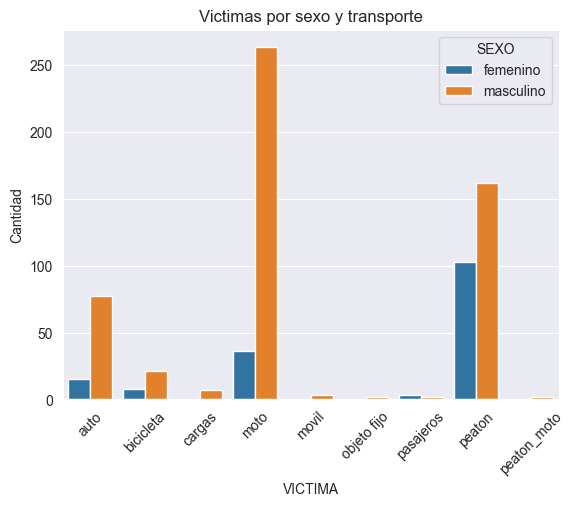

In [47]:
sns.barplot(data=df_completo_vic_sex, x='VICTIMA', y='Cantidad', hue='SEXO')
plt.title('Victimas por sexo y transporte')
plt.xticks(rotation=45)
plt.show()

En la gráfica anterior podemos ver claramente que tanto en moto como en auto, las víctimas son principalmente masculinas. La diferencia es menor en caso de peatones y bicicletas.

Ahora veamos en el mapa si tenemos alguna distribución diferente en cuanto a estas variables. Comencemos con la variable SEXO.

In [48]:
fig = px.scatter_mapbox(df_completo, lat="lat", lon="long", color="SEXO", zoom=10)
fig.update_layout(mapbox_style="open-street-map", width=1000, height=1000)
fig.show()

Una primera observación nos permite ver que: 
- en Avenida General Paz la cantidad de víctimas de sexo masculino parecen ser mayores. 
- en la zona de plaza constitución la mayoría de las víctimas son de sexo masculino.

Analicemos el mapa pero por edades. Para ello primero definiremos una columna con rangos de edad. En este caso tendremos que eliminar los datos faltantes de edad.

In [49]:
df_completo_edad = df_completo[~df_completo['EDAD'].isna()]
df_completo_edad['EDAD'] = df_completo_edad['EDAD'].astype(int)
bins = list(range(0, df_completo_edad['EDAD'].max() + 6, 5))  

labels = [f"{i}-{i+4}" for i in range(0, df_completo_edad['EDAD'].max() + 1, 5)] 

df_completo_edad['rango_etario'] = pd.cut(df_completo_edad['EDAD'], bins=bins, labels=labels, right=False)

df_completo_edad.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,long,lat,PARTICIPANTES,VICTIMA,ACUSADO,DIA_SEM,ROL,SEXO,EDAD,rango_etario
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,av piedra buena y av fernandez de la cruz,avenida,...,-58.475340,-34.687570,moto-auto,moto,auto,4,conductor,masculino,19,15-19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,av gral paz y av de los corrales,gral paz,...,-58.508775,-34.669777,auto-pasajeros,auto,pasajeros,5,conductor,masculino,70,70-74
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,av entre rios 2034,avenida,...,-58.390403,-34.631894,moto-auto,moto,auto,6,conductor,masculino,30,30-34
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,av larrazabal y gral villegas conrado,avenida,...,-58.465039,-34.680930,moto-sd,moto,NaN,6,conductor,masculino,18,15-19
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,av san juan y presidente luis saenz peña,avenida,...,-58.387183,-34.622466,moto-pasajeros,moto,pasajeros,3,conductor,masculino,29,25-29


In [50]:
fig = px.scatter_mapbox(df_completo_edad, lat="lat", lon="long", color="rango_etario", zoom=11)
fig.update_layout(mapbox_style="open-street-map", width=1000, height=1000)
fig.show()

No podemos apreciar una tendencia clara en la distribución geográfica de víctimas por edades. Generemos un nuevo mapa pero con sólo 3 divisiones en el rango etario.

In [53]:
df_completo['rango_etario'] = np.where(df_completo['EDAD'] <= 32, '(0,32] años', 
                                       np.where((df_completo['EDAD'] > 32) | (df_completo['EDAD'] <= 64), '(32,64] años', 'mayor a 64 años')
                                        )
fig = px.scatter_mapbox(df_completo, lat="lat", lon="long", color="rango_etario", zoom=11)
fig.update_layout(mapbox_style="open-street-map", width=1000, height=1000)
fig.show()
                        

No podemos apreciar una tendencia en cuanto a las edades y distribución geográfica.

# KPIs

Carguemos el archivo de población

In [62]:
df_pob = pd.read_csv('CleanData/poblacion.csv')
df_pob.head()

,Comuna,2016,2017,2018,2019,2020,2021
0,Total,3059122.0,3063728.0,3068043.0,3072029.0,3075646.0,3078836.0
1,1,252053.0,253271.0,254408.0,255457.0,256405.0,257235.0
2,2,149848.0,149720.0,149607.0,149510.0,149430.0,149371.0
3,3,192573.0,192763.0,192945.0,193115.0,193276.0,193425.0
4,4,238303.0,238809.0,239279.0,239712.0,240100.0,240437.0


Modificamos el dataframe para posterior uso. Generemos una columna Año y una Población para tener el dataframe en formato 'large'.

In [63]:
df_pob = df_pob.melt(id_vars='Comuna', var_name='AAAA', value_name='POBLACION').rename(columns= {'Comuna': 'COMUNA'})
df_pob.head()

,COMUNA,AAAA,POBLACION
0,Total,2016,3059122.0
1,1,2016,252053.0
2,2,2016,149848.0
3,3,2016,192573.0
4,4,2016,238303.0


In [64]:
df_pob.info()       # es correcto el total de 96, ya que son 15 comunas mas la población total, por 6 años

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COMUNA     96 non-null     object 
 1   AAAA       96 non-null     object 
 2   POBLACION  96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 2.4+ KB


In [65]:
df_pob['COMUNA'].unique()

array(['Total', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'], dtype=object)

Cambiemos el tipo de dato de AAAA a int

In [66]:
df_pob['AAAA'] = df_pob['AAAA'].astype('int64')

In [67]:
df_pob.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COMUNA     96 non-null     object 
 1   AAAA       96 non-null     int64  
 2   POBLACION  96 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


Definimos la métrica tasa de homicidios en siniestros viales como el número de víctimas fatales en accidentes de tránsito por cada 100,000 habitantes en un área geográfica durante un período de tiempo específico. Su fórmula es: (Número de homicidios en siniestros viales / Población total) * 100,000

Generemos un DataFrame con la tasa de homicidios por semestre en siniestros viales por comuna y total para todos los semestres de los años en estudio. Para ello necesitamos la cantidad total de víctimas por año y por comuna.

In [68]:
# primero generamos un dataframe con la información que vamos a utilizar
df_tasa_homicidios = df[['COMUNA', 'N_VICTIMAS', 'AAAA', 'MM']]
df_tasa_homicidios['SEMESTRE'] = df_tasa_homicidios['MM'].apply(lambda x: 1 if x in [mes for mes in range(1,7)] else 2)
df_tasa_homicidios.drop(columns='MM', inplace=True)
df_tasa_homicidios = df_tasa_homicidios.groupby(['COMUNA', 'AAAA', 'SEMESTRE']).agg(sum).reset_index()
df_tasa_homicidios.head()

,COMUNA,AAAA,SEMESTRE,N_VICTIMAS
0,1,2016,1,12
1,1,2016,2,10
2,1,2017,1,13
3,1,2017,2,7
4,1,2018,1,9


In [69]:
# agreguemos al dataframe los datos totales
df_total = df_tasa_homicidios.groupby(['AAAA', 'SEMESTRE']).agg({'N_VICTIMAS' : 'sum'}).reset_index()
df_total['COMUNA'] = 'Total'
df_tasa_homicidios = pd.concat([df_tasa_homicidios , df_total], axis=0).reset_index(drop=True)
df_tasa_homicidios.tail()

,COMUNA,AAAA,SEMESTRE,N_VICTIMAS
176,Total,2019,2,47
177,Total,2020,1,31
178,Total,2020,2,50
179,Total,2021,1,55
180,Total,2021,2,42


In [70]:
df_tasa_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMUNA      181 non-null    object
 1   AAAA        181 non-null    int64 
 2   SEMESTRE    181 non-null    int64 
 3   N_VICTIMAS  181 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


Cambiemos el tipo de dato de 'COMUNA' a string

In [71]:
df_tasa_homicidios['COMUNA'] = df_tasa_homicidios['COMUNA'].astype(str)

In [72]:
# agreguemos ahora la columna de población al dataframe generado en la celda anterior:
df_tasa_homicidios = df_tasa_homicidios.merge(df_pob, on=['COMUNA', 'AAAA'], how= 'left')
df_tasa_homicidios.head()

,COMUNA,AAAA,SEMESTRE,N_VICTIMAS,POBLACION
0,1,2016,1,12,252053.0
1,1,2016,2,10,252053.0
2,1,2017,1,13,253271.0
3,1,2017,2,7,253271.0
4,1,2018,1,9,254408.0


In [73]:
df_tasa_homicidios.tail()

,COMUNA,AAAA,SEMESTRE,N_VICTIMAS,POBLACION
176,Total,2019,2,47,3072029.0
177,Total,2020,1,31,3075646.0
178,Total,2020,2,50,3075646.0
179,Total,2021,1,55,3078836.0
180,Total,2021,2,42,3078836.0


Ahora agreguemos una columna con la tasa de homicidios por accidentes de tránsito:

In [74]:
df_tasa_homicidios['TASA_HOMICIDIOS'] = (df_tasa_homicidios['N_VICTIMAS'] / df_tasa_homicidios['POBLACION'])*100000
df_tasa_homicidios.head()

,COMUNA,AAAA,SEMESTRE,N_VICTIMAS,POBLACION,TASA_HOMICIDIOS
0,1,2016,1,12,252053.0,4.760903
1,1,2016,2,10,252053.0,3.967420
2,1,2017,1,13,253271.0,5.132842
3,1,2017,2,7,253271.0,2.763838
4,1,2018,1,9,254408.0,3.537625


In [92]:
df_tasa_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COMUNA           181 non-null    object 
 1   AAAA             181 non-null    int64  
 2   SEMESTRE         181 non-null    int64  
 3   N_VICTIMAS       181 non-null    int64  
 4   POBLACION        181 non-null    float64
 5   TASA_HOMICIDIOS  181 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 8.6+ KB


En el dataframe generado, tenemos la tasa de homicidios por accidentes de tránsito para cada comuna y para el total de CABA, por año y por semestre. <br>
Visualicemos estos datos:

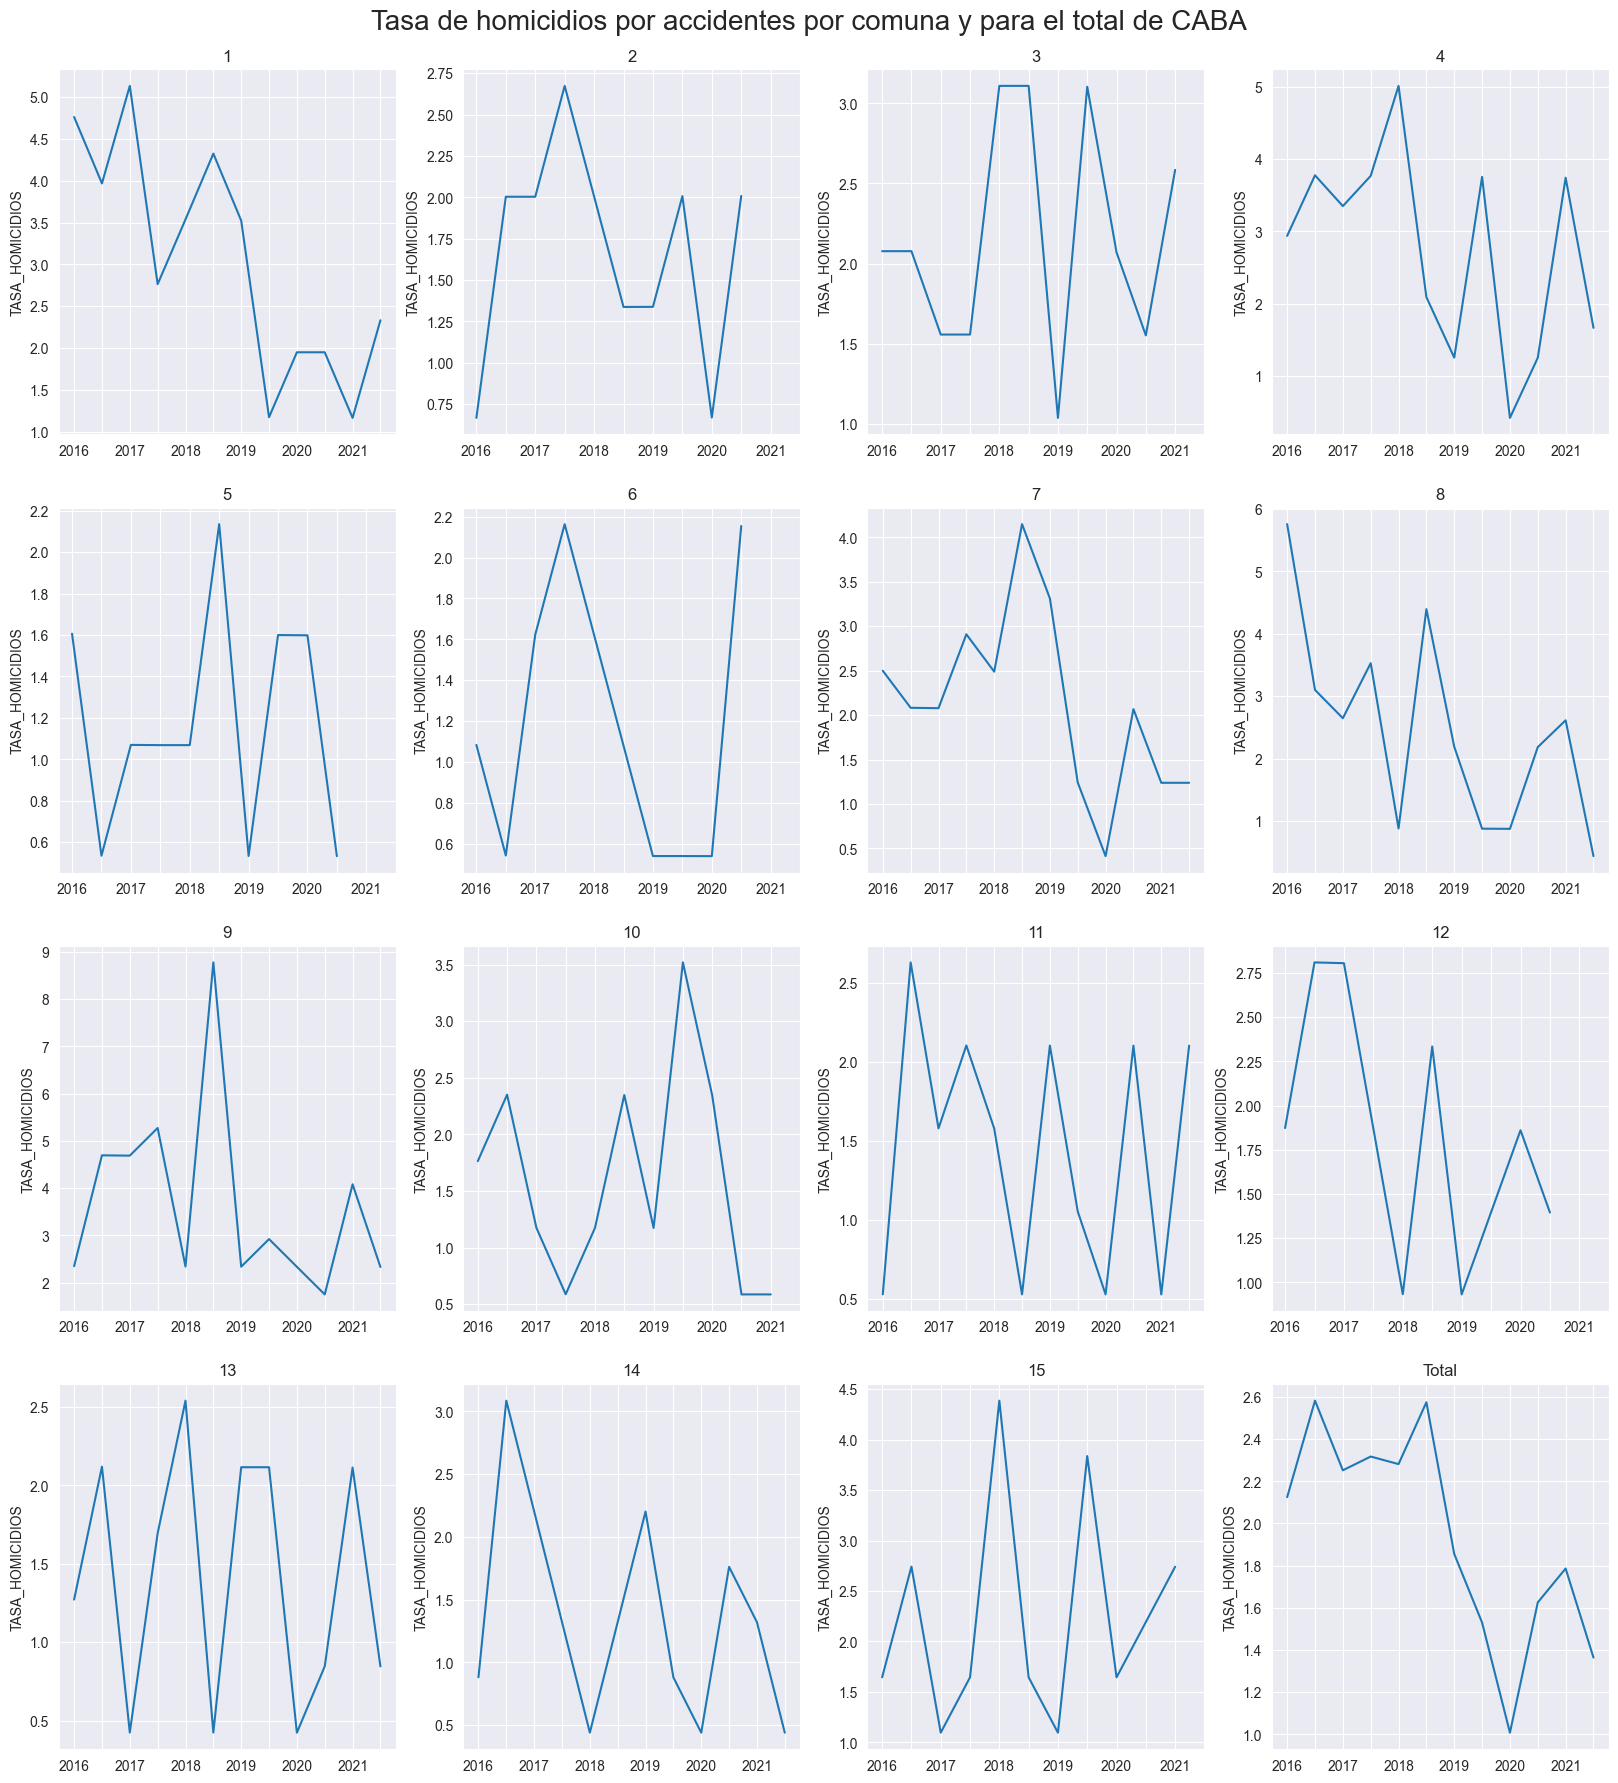

In [91]:
comunas = df_tasa_homicidios['COMUNA'].unique().tolist()

fig, axs = plt.subplots(4, 4, figsize=(20,20))

for i, comuna in enumerate(comunas):
    row = i // 4  
    col = i % 4   
    df_comuna = df_tasa_homicidios[df_tasa_homicidios['COMUNA'] == comuna].reset_index(drop=True)
    sns.lineplot(data=df_comuna, x=df_comuna.index, y='TASA_HOMICIDIOS', ax=axs[row, col])
    axs[row, col].set_title(comuna)  
    axs[row, col].set_xticks(range(12))
    axs[row, col].set_xticklabels(['2016', '', '2017', '', '2018', '', '2019', '', '2020', '', '2021', ''])

plt.subplots_adjust(top=0.95)
fig.suptitle('Tasa de homicidios por accidentes por comuna y para el total de CABA', fontsize=20)
plt.show()

Algunas observaciones sobre las gráficas anteriores:
- La mayoría de las comunas muestra una reducción de la tasa de homicidios en el primer semestre de 2020, correspondiendo con el comienzo de la restricción de circulación.
- El punto anterior es muy notorio en el caso del Total de CABA.
- Algunas comunas muestran una tendencia a de reducción de la métrica en estudio durante los años registrados, por ejemplo las comunas 1, 2, 12 y 14. 
- El total de CABA parece que antes de la pandemia estaba en reducción, durante el primer semestre de 2020 disminuyó fuertemente, para luego retomar  la tasa de reducción que venía teniendo antes de la pandemia.

Veamos algunos datos interesantes sobre las tasas de homicidios por accidentes de tránsito calculadas:

In [96]:
print('La máxima tasa de homicidios por accidentes de tránsito es:')
df_tasa_homicidios.iloc[df_tasa_homicidios['TASA_HOMICIDIOS'].idxmax(),:]

La máxima tasa de homicidios por accidentes de tránsito es:


COMUNA                    9
AAAA                   2018
SEMESTRE                  2
N_VICTIMAS               15
POBLACION          170842.0
TASA_HOMICIDIOS    8.780042
Name: 94, dtype: object

In [97]:
print('La mínima tasa de homicidios por accidentes de tránsito es')
df_tasa_homicidios.iloc[df_tasa_homicidios['TASA_HOMICIDIOS'].idxmin(),:]

La mínima tasa de homicidios por accidentes de tránsito es


COMUNA                    7
AAAA                   2020
SEMESTRE                  1
N_VICTIMAS                1
POBLACION          241861.0
TASA_HOMICIDIOS    0.413461
Name: 73, dtype: object

In [99]:
print('Estadísticas generales sobre el KPI Tasa de homicidios por accidentes de tránsito:')
df_tasa_homicidios['TASA_HOMICIDIOS'].describe()

Estadísticas generales sobre el KPI Tasa de homicidios por accidentes de tránsito:


count    181.000000
mean       2.029095
std        1.237311
min        0.413461
25%        1.173041
50%        1.950040
75%        2.541221
max        8.780042
Name: TASA_HOMICIDIOS, dtype: float64

Enfocándonos en el Total de CABA, tenemos:

In [100]:
print('Estadísticas generales sobre el KPI Tasa de homicidios por accidentes de tránsito en CABA:')
df_tasa_homicidios[df_tasa_homicidios['COMUNA'] == 'Total']['TASA_HOMICIDIOS'].describe()

Estadísticas generales sobre el KPI Tasa de homicidios por accidentes de tránsito en CABA:


count    12.000000
mean      1.941905
std       0.495858
min       1.007918
25%       1.601739
50%       1.990122
75%       2.290548
max       2.582440
Name: TASA_HOMICIDIOS, dtype: float64

In [104]:
df_tasa_homicidios[df_tasa_homicidios['COMUNA'] == 'Total']['TASA_HOMICIDIOS'].reset_index(drop=True)

0     2.124793
1     2.582440
2     2.252158
3     2.317438
4     2.281585
5     2.574931
6     1.855451
7     1.529933
8     1.007918
9     1.625675
10    1.786389
11    1.364152
Name: TASA_HOMICIDIOS, dtype: float64

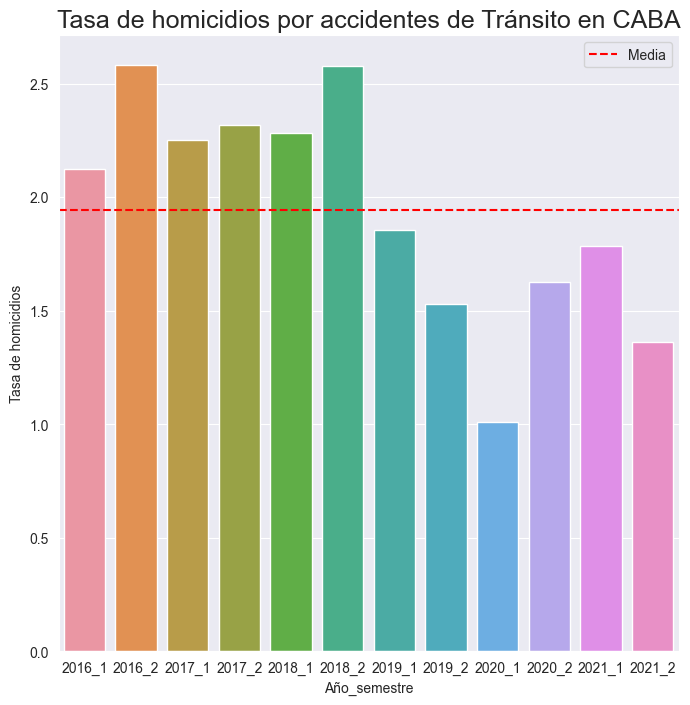

In [119]:
plt.figure(figsize=(8,8))
sns.barplot(x=df_tasa_homicidios[df_tasa_homicidios['COMUNA'] == 'Total']['TASA_HOMICIDIOS'].reset_index(drop=True).index,
            y= df_tasa_homicidios[df_tasa_homicidios['COMUNA'] == 'Total']['TASA_HOMICIDIOS'].reset_index(drop=True).values)
plt.xticks(ticks=range(12), 
           labels=['2016_1', '2016_2', '2017_1', '2017_2', '2018_1', '2018_2', '2019_1', '2019_2', '2020_1', '2020_2', '2021_1', '2021_2'])
plt.title('Tasa de homicidios por accidentes de Tránsito en CABA', fontsize=18)
media= np.mean(df_tasa_homicidios[df_tasa_homicidios['COMUNA'] == 'Total']['TASA_HOMICIDIOS'])
plt.axhline(y= media, color='r', linestyle='--', label='Media')
plt.ylabel('Tasa de homicidios')
plt.xlabel('Año_semestre')
plt.legend()
plt.show()

En la gráfica anterior, podemos ver más claramente cómo, a partir del primer semestre de 2019, la tasa de homicidios por accidentes de tránsito en CABA comienza a estar por debajo de la media total.

Ahora definamos el KPI que se solicita, el cual corresponde a la variación de la métrica 'Tasa de homicidios en CABA' respecto al semestre anterior. <br>


In [171]:
df_caba = df_tasa_homicidios[df_tasa_homicidios['COMUNA'] == 'Total'][['AAAA', 'SEMESTRE', 'TASA_HOMICIDIOS']]
df_caba['TASA_ANTERIOR'] = df_caba['TASA_HOMICIDIOS'].shift(1)
df_caba['KPI_tasa'] = (df_caba['TASA_ANTERIOR'] - df_caba['TASA_HOMICIDIOS'])*100 / df_caba['TASA_ANTERIOR']
df_caba.drop(columns=['TASA_HOMICIDIOS', 'TASA_ANTERIOR'], inplace=True)
df_caba.reset_index(drop=True, inplace=True)
df_caba

,AAAA,SEMESTRE,KPI_tasa
0,2016,1,NaN
1,2016,2,-21.538462
2,2017,1,12.789537
3,2017,2,-2.898551
4,2018,1,1.547113
5,2018,2,-12.857143
6,2019,1,27.941719
7,2019,2,17.543860
8,2020,1,34.120120
9,2020,2,-61.290323


Eliminemos el año 2016 semestre 1 que no tiene KPI:

In [172]:
df_caba = df_caba.drop(index=0).reset_index(drop=True)

In [173]:
df_caba

,AAAA,SEMESTRE,KPI_tasa
0,2016,2,-21.538462
1,2017,1,12.789537
2,2017,2,-2.898551
3,2018,1,1.547113
4,2018,2,-12.857143
5,2019,1,27.941719
6,2019,2,17.543860
7,2020,1,34.120120
8,2020,2,-61.290323
9,2021,1,-9.886028


En el caso de este KPI, valores positivos indican que en el semestre actual, tenemos menor tasa de accidentes que el semestre anterior, lo cual constituye una mejoría. 
Ahora, visualicemos los datos anteriores para tener una mejor comprensión de la variación:

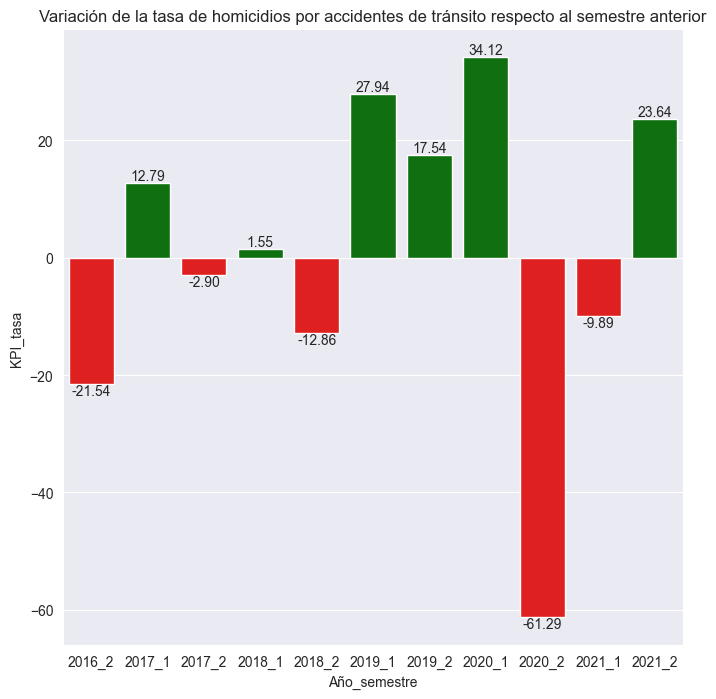

In [174]:
plt.figure(figsize=(8,8))
colors = ['green' if kpi > 0 else 'red' for kpi in df_caba['KPI_tasa']]
bar = sns.barplot(data=df_caba, x=df_caba.index, y='KPI_tasa', palette=colors)
bar.bar_label(bar.containers[0], fmt='%.2f', label_type='edge')
plt.xticks(ticks=range(11), 
           labels=['2016_2', '2017_1', '2017_2', '2018_1', '2018_2', '2019_1', '2019_2', '2020_1', '2020_2', '2021_1', '2021_2'])
plt.xlabel('Año_semestre')
plt.title('Variación de la tasa de homicidios por accidentes de tránsito respecto al semestre anterior')
plt.show()

El objetivo es : Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior. <br>
Por lo tanto, podemos decir que en el primer semestre de 2017, primer y segundo semestre de 2019 y primer semestre de 2020, se han cumplido los objetivos. Sin embargo, hay que tener en cuenta que el cumplimiento de primer semestre de 2020 se debe a la restricción de circulación por pandemia. Luego, en el segundo semestre de 2021, tenemos un notorio resultado positivo.

Ahora definiremos un segundo KPI:
Definimos a la cantidad de accidentes mortales de motociclistas en siniestros viales como el número absoluto de accidentes fatales en los que estuvieron involucradas víctimas que viajaban en moto en un determinado periodo temporal. Su fórmula para medir la evolución de los accidentes mortales con víctimas en moto es: (Número de accidentes mortales con víctimas en moto en el año anterior - Número de accidentes mortales con víctimas en moto en el año actual) / (Número de accidentes mortales con víctimas en moto en el año anterior) * 100<br>
En este caso el periodo temporal es anual. <br>
Generemos un dataframe para este KPI

In [121]:
df['VICTIMA'].unique()

array(['moto', 'auto', 'peaton', nan, 'cargas', 'bicicleta', 'pasajeros',
       'movil', 'objeto fijo', 'peaton_moto'], dtype=object)

In [139]:
df_moto = df[df['VICTIMA'].isin(['moto', 'peaton_moto'])]
df_moto = df_moto.groupby('AAAA').size().reset_index(name='Cantidad de accidentes')
df_moto

,AAAA,Cantidad de accidentes
0,2016,64
1,2017,53
2,2018,55
3,2019,50
4,2020,28
5,2021,46


En el dataframe anterior podemos observar la métrica 'Cantidad de accidentes mortales en siniestros viales en los que una víctima fatal viajaba en moto'. <br>
El KPI solicitado, es cómo varía esta métrica con respecto al año anterior. Para ello generamos una nueva columna con los accidentes del año anterior, y luego una columna con el KPI solicitado.

In [140]:
df_moto['Accidentes año anterior'] = df_moto['Cantidad de accidentes'].shift(1)
df_moto['KPI_moto'] = (df_moto['Accidentes año anterior'] - df_moto['Cantidad de accidentes'])*100 / df_moto['Accidentes año anterior']
df_moto.drop(columns=['Cantidad de accidentes', 'Accidentes año anterior'], inplace=True)
df_moto

,AAAA,KPI_moto
0,2016,NaN
1,2017,17.187500
2,2018,-3.773585
3,2019,9.090909
4,2020,44.000000
5,2021,-64.285714


Eliminemos el año 2016, ya que no tenemos KPI para ese año.

In [141]:
df_moto.drop(index=0, inplace=True)

En la tabla anterior tenemos el KPI calculado. El KPI toma valores negativos cuando en el año actual la cantidad de accidentes con víctimas fatales en moto es mayor que el año anterior, y positivos cuando la cantidad de accidentes con víctimas fatales en moto es menor que el año anterior. Por lo tanto, los valores más positivos son mejoras respecto al año anterior. Sin embargo, es mejor visualizarlo gráficamente para tener una mejor comprensión de su variación:

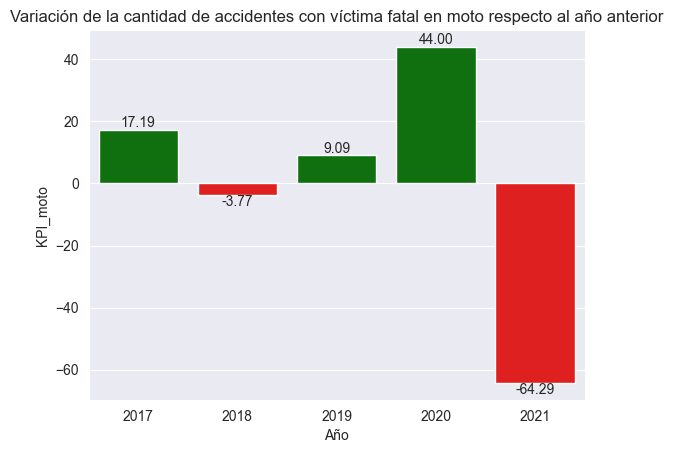

In [146]:
colors = ['green' if kpi > 0 else 'red' for kpi in df_moto['KPI_moto']]
bar = sns.barplot(data=df_moto, x='AAAA', y='KPI_moto', palette=colors)
bar.bar_label(bar.containers[0], fmt='%.2f', label_type='edge')
plt.xlabel('Año')
plt.title('Variación de la cantidad de accidentes con víctima fatal en moto respecto al año anterior')
plt.show()

El KPI calculado y graficado nos permite ver que en el año 2017 y 2019 se cumplió con el objetivo propuesto (reducir un 7% la cantidad de accidentes con víctima fatal en moto respecto al año anterior). En 2020 también, sin embargo esto se debe principalmente a la pandemia. Como vemos, en el año 2021 el KPI tiene valor muy negativo, por lo que indica que aumenta nuevamente la cantidad de víctimas en moto.